Live Code 6

## 1. Introduction

**Nama**: iqbal saputra

**Batch**: RMT-032

**Objective**: Notebook ini dibuat untuk membuat model kmeans dan pca untuk memberikan rekomendasi nama-nama influencer dari dataset yang disediakan jika produk perusahaan tersebut merupakan produk kecantikan wanita. Nyatakan secara jelas negara mana yang membutuhkan bantuan

## 2. Libraries


In [1]:
# Import Library
# Library Dataframe
import pandas as pd

# Library Numerical Data
import numpy as np

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Statistics
from scipy import stats
from scipy.stats import pearsonr, kendalltau, spearmanr, uniform

# Library Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

# Libraries for Modeling ML
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score,KFold, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, roc_auc_score,mean_squared_error, root_mean_squared_error, r2_score, accuracy_score , classification_report , confusion_matrix,precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from feature_engine.outliers import Winsorizer
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import uniform, randint
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.tree import DecisionTreeClassifier
# lib pipelines
from sklearn.pipeline import Pipeline

# Model Saving
import pickle
import json
import joblib

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

import string

## 3. Data Loading


### Column Description


| Column | Description |
| --- | --- |
| `fullname` | Nama lengkap influencer |
| `first_name` | Nama depan influencer |
| `last_name` | Nama belakang influencer |
| `username` | Username influencer |
| `gender` | Jenis kelamin influencer |
| `num_reactions` | Jumlah viewer yang memberikan reaksi saat seorang influencer live |
| `num_comments` | Jumlah viewer yang memberikan komentar saat seorang influencer live |
| `num_shares` | Jumlah viewer yang melakukan share live video influencer tersebut |
| `num_likes` | Jumlah viewer yang menyukai live video influencer tersebut |
| `num_loves` | Jumlah viewer yang memberikan reaksi `love` saat seorang influencer live |
| `num_wows` | Jumlah viewer yang memberikan reaksi `wow` saat seorang influencer live |
| `num_hahas` | Jumlah viewer yang memberikan reaksi `haha` saat seorang influencer live |
| `num_sads` | Jumlah viewer yang memberikan reaksi `sad` saat seorang influencer live |
| `num_angrys` | Jumlah viewer yang memberikan reaksi `angry` saat seorang influencer live |


**penjelasan** :

dari deskripsi kolom, kita dapat melihat bahwa data memiliki beberapa **kolom kategorikal** dan **kolom numerik**

In [2]:
# Make new dataset
df = pd.read_csv('influencers.csv')
# Show first 10 data
df.head(10)

,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,Albrecht Consadine,Albrecht,Consadine,aconsadinere,Male,1360,1358,597,978,278,98,5,0,1
1,Hayes Patriskson,Hayes,Patriskson,hpatrisksonkl,Male,2273,2,6,2273,0,0,0,0,0
2,Napoleon McVicar,Napoleon,McVicar,nmcvicar2v,Male,197,540,261,170,27,0,0,0,0
3,Simeon Kenan,Simeon,Kenan,skenan4f,Male,55,785,83,42,10,1,1,1,0
4,Laraine Frenzel;,Laraine,Frenzel;,lfrenzelmr,Female,216,679,191,160,52,2,2,0,0
5,Casar Jeves,Casar,Jeves,cjeves79,Male,5,0,0,5,0,0,0,0,0
6,Jaquelin Rubertis,Jaquelin,Rubertis,jrubertisia,Female,206,525,265,147,56,0,3,0,0
7,Veronika Moehle,Veronika,Moehle,vmoehlebt,Female,249,7,1,249,0,0,0,0,0
8,Bendix Yeeles,Bendix,Yeeles,byeelespy,Male,170,726,148,100,64,2,3,1,0
9,Ashlie Orto,Ashlie,Orto,aorto6f,Female,267,859,426,197,67,0,2,1,0


**penjelasan** :

menampilkan 10 data pertama

In [3]:
# Show last 10 data
df.tail(10)

,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
2324,Adolphe Buchett,Adolphe,Buchett,abuchett1a,Male,4,0,0,3,1,0,0,0,0
2325,Elise Willarton,Elise,Willarton,ewillartoneq,Female,394,2195,403,269,122,1,2,0,0
2326,Douglas Jarlmann,Douglas,Jarlmann,djarlmannjv,Male,973,8,1,973,0,0,0,0,0
2327,Morrie Aldwich,Morrie,Aldwich,maldwich43,Male,1809,1384,549,1521,267,10,8,1,2
2328,Nanci McGroarty,Nanci,McGroarty,nmcgroarty4m,Female,362,745,199,190,168,3,1,0,0
2329,Olenolin Badcock,Olenolin,Badcock,obadcockom,Male,758,24,3,758,0,0,0,0,0
2330,Letty Sitlington,Letty,Sitlington,lsitlingtonbi,Female,27,0,0,27,0,0,0,0,0
2331,Lucas Billsberry,Lucas,Billsberry,lbillsberry55,Male,0,0,0,0,0,0,0,0,0
2332,Mathias Slobom,Mathias,Slobom,mslobom1b,Male,0,0,0,0,0,0,0,0,0
2333,Brook Chichgar,Brook,Chichgar,bchichgar5e,Male,2,0,0,2,0,0,0,0,0


**penjelasan** :

menampilkan 10 data terakhir

In [4]:
# Duplicate Dataset
new_data = df.copy()

**penjelasan** :

membuat salinan dataset untuk memastikan data asli aman dan tidak berubah

In [5]:
# Show dataset info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fullname       2334 non-null   object
 1   first_name     2334 non-null   object
 2   last_name      2334 non-null   object
 3   username       2334 non-null   object
 4   gender         2334 non-null   object
 5   num_reactions  2334 non-null   int64 
 6   num_comments   2334 non-null   int64 
 7   num_shares     2334 non-null   int64 
 8   num_likes      2334 non-null   int64 
 9   num_loves      2334 non-null   int64 
 10  num_wows       2334 non-null   int64 
 11  num_hahas      2334 non-null   int64 
 12  num_sads       2334 non-null   int64 
 13  num_angrys     2334 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 255.4+ KB


**penjelasan** :

dari info dataset tersebut kita dapat melihat bahwa :
* ada entri `2334` dalam kumpulan data
* tipe data `9` **int**, dan `5`**object**

## 4. Exploratory Data Analysis


In [6]:
# Describe dataset
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,2334.0,283.409597,446.605370,0.0,28.25,160.0,296.75,4094.0
num_comments,2334.0,642.478149,1442.202386,0.0,0.00,39.0,670.75,20990.0
num_shares,2334.0,115.679949,206.980639,0.0,0.00,12.0,169.00,3424.0
num_likes,2334.0,243.015424,413.178828,0.0,27.00,117.0,238.00,4094.0
num_loves,2334.0,35.540274,63.326895,0.0,0.00,3.0,49.00,657.0
num_wows,2334.0,2.448158,14.625152,0.0,0.00,0.0,1.00,278.0
num_hahas,2334.0,1.735219,6.046270,0.0,0.00,0.0,2.00,157.0
num_sads,2334.0,0.413882,1.477969,0.0,0.00,0.0,0.00,37.0
num_angrys,2334.0,0.254070,0.711890,0.0,0.00,0.0,0.00,8.0


In [7]:
# Count duplicated data
new_data.duplicated().sum()

0

**penjelasan** :

**tidak ada data duplikat**

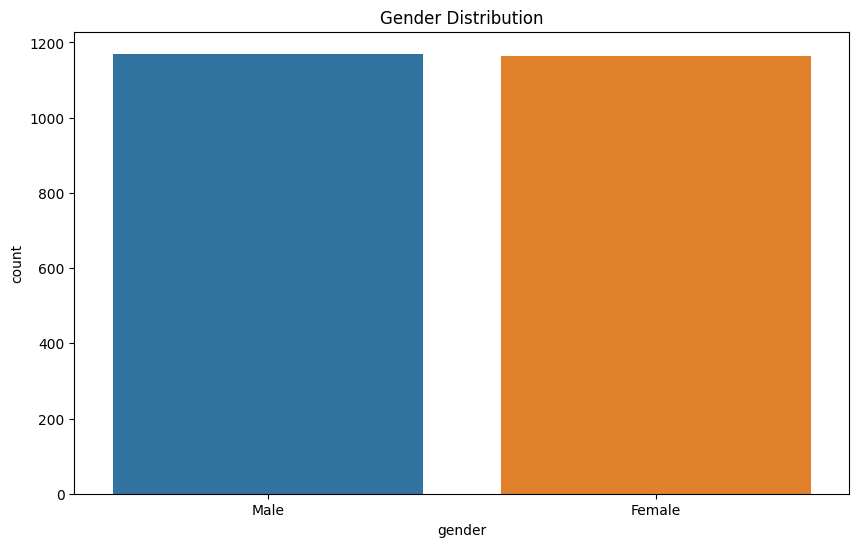

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=new_data)
plt.title('Gender Distribution')
plt.show()


In [9]:
# Splitting between numerical and categorical columns
cat_columns = ['fullname','first_name','last_name','username','gender'
]
num_columns = [col for col in new_data.columns if col not in cat_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['fullname', 'first_name', 'last_name', 'username', 'gender']
Numcerical Columns:  ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']


**penjelasan** :

Setelah memisahkan kumpulan data, sekarang kita dapat melanjutkan untuk menyelidiki apakah data numerik memiliki outlier

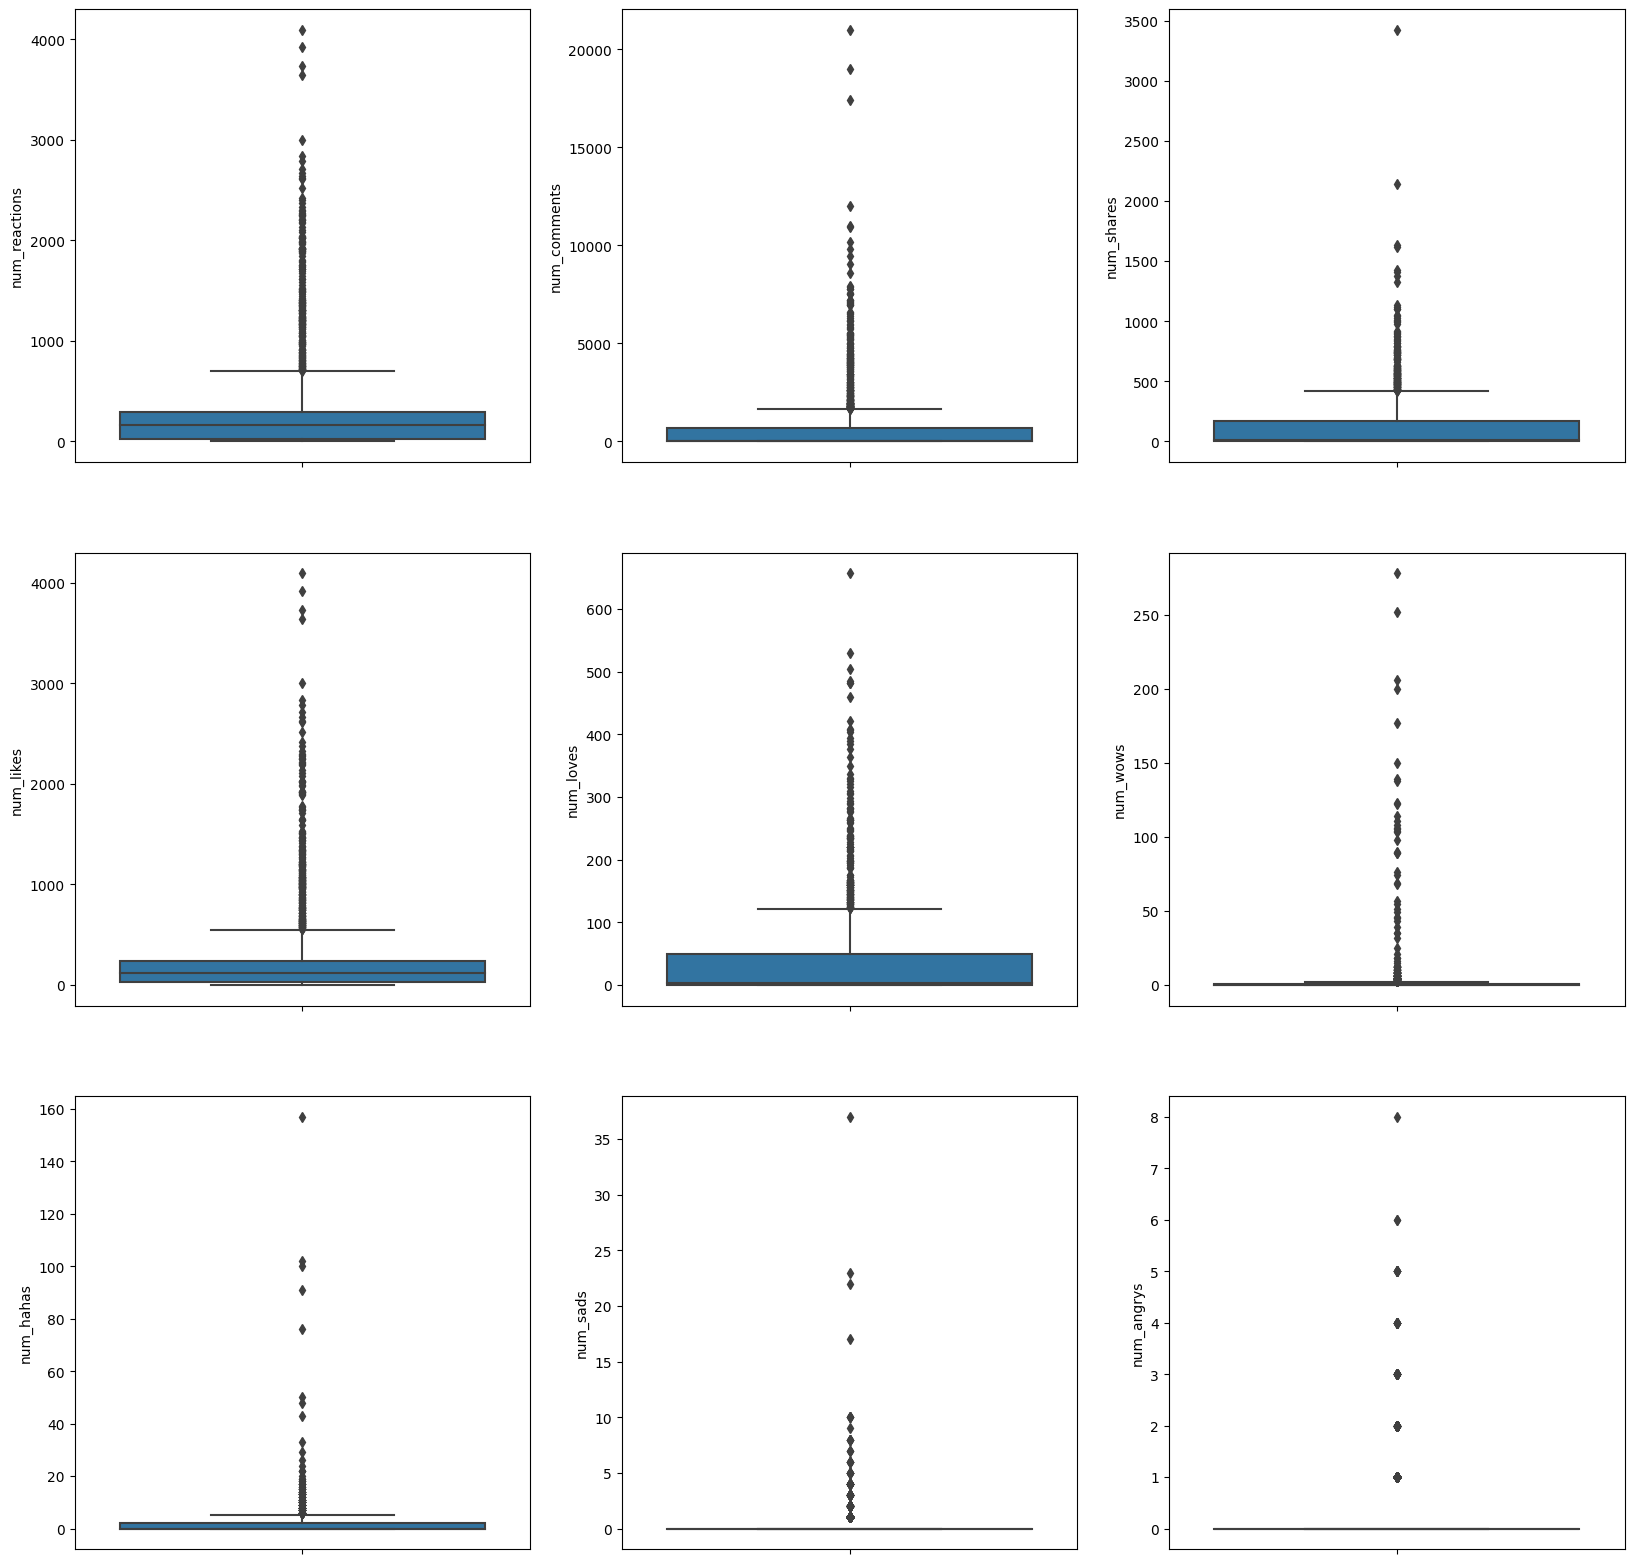

In [10]:
# Check the outliers of numerical data
fig = plt.figure(figsize=(20, 20))
cols = num_columns
num_rows = 3

num_cols = 3

for index in range(9):
    fig.add_subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=new_data, y=cols[index])
plt.show()

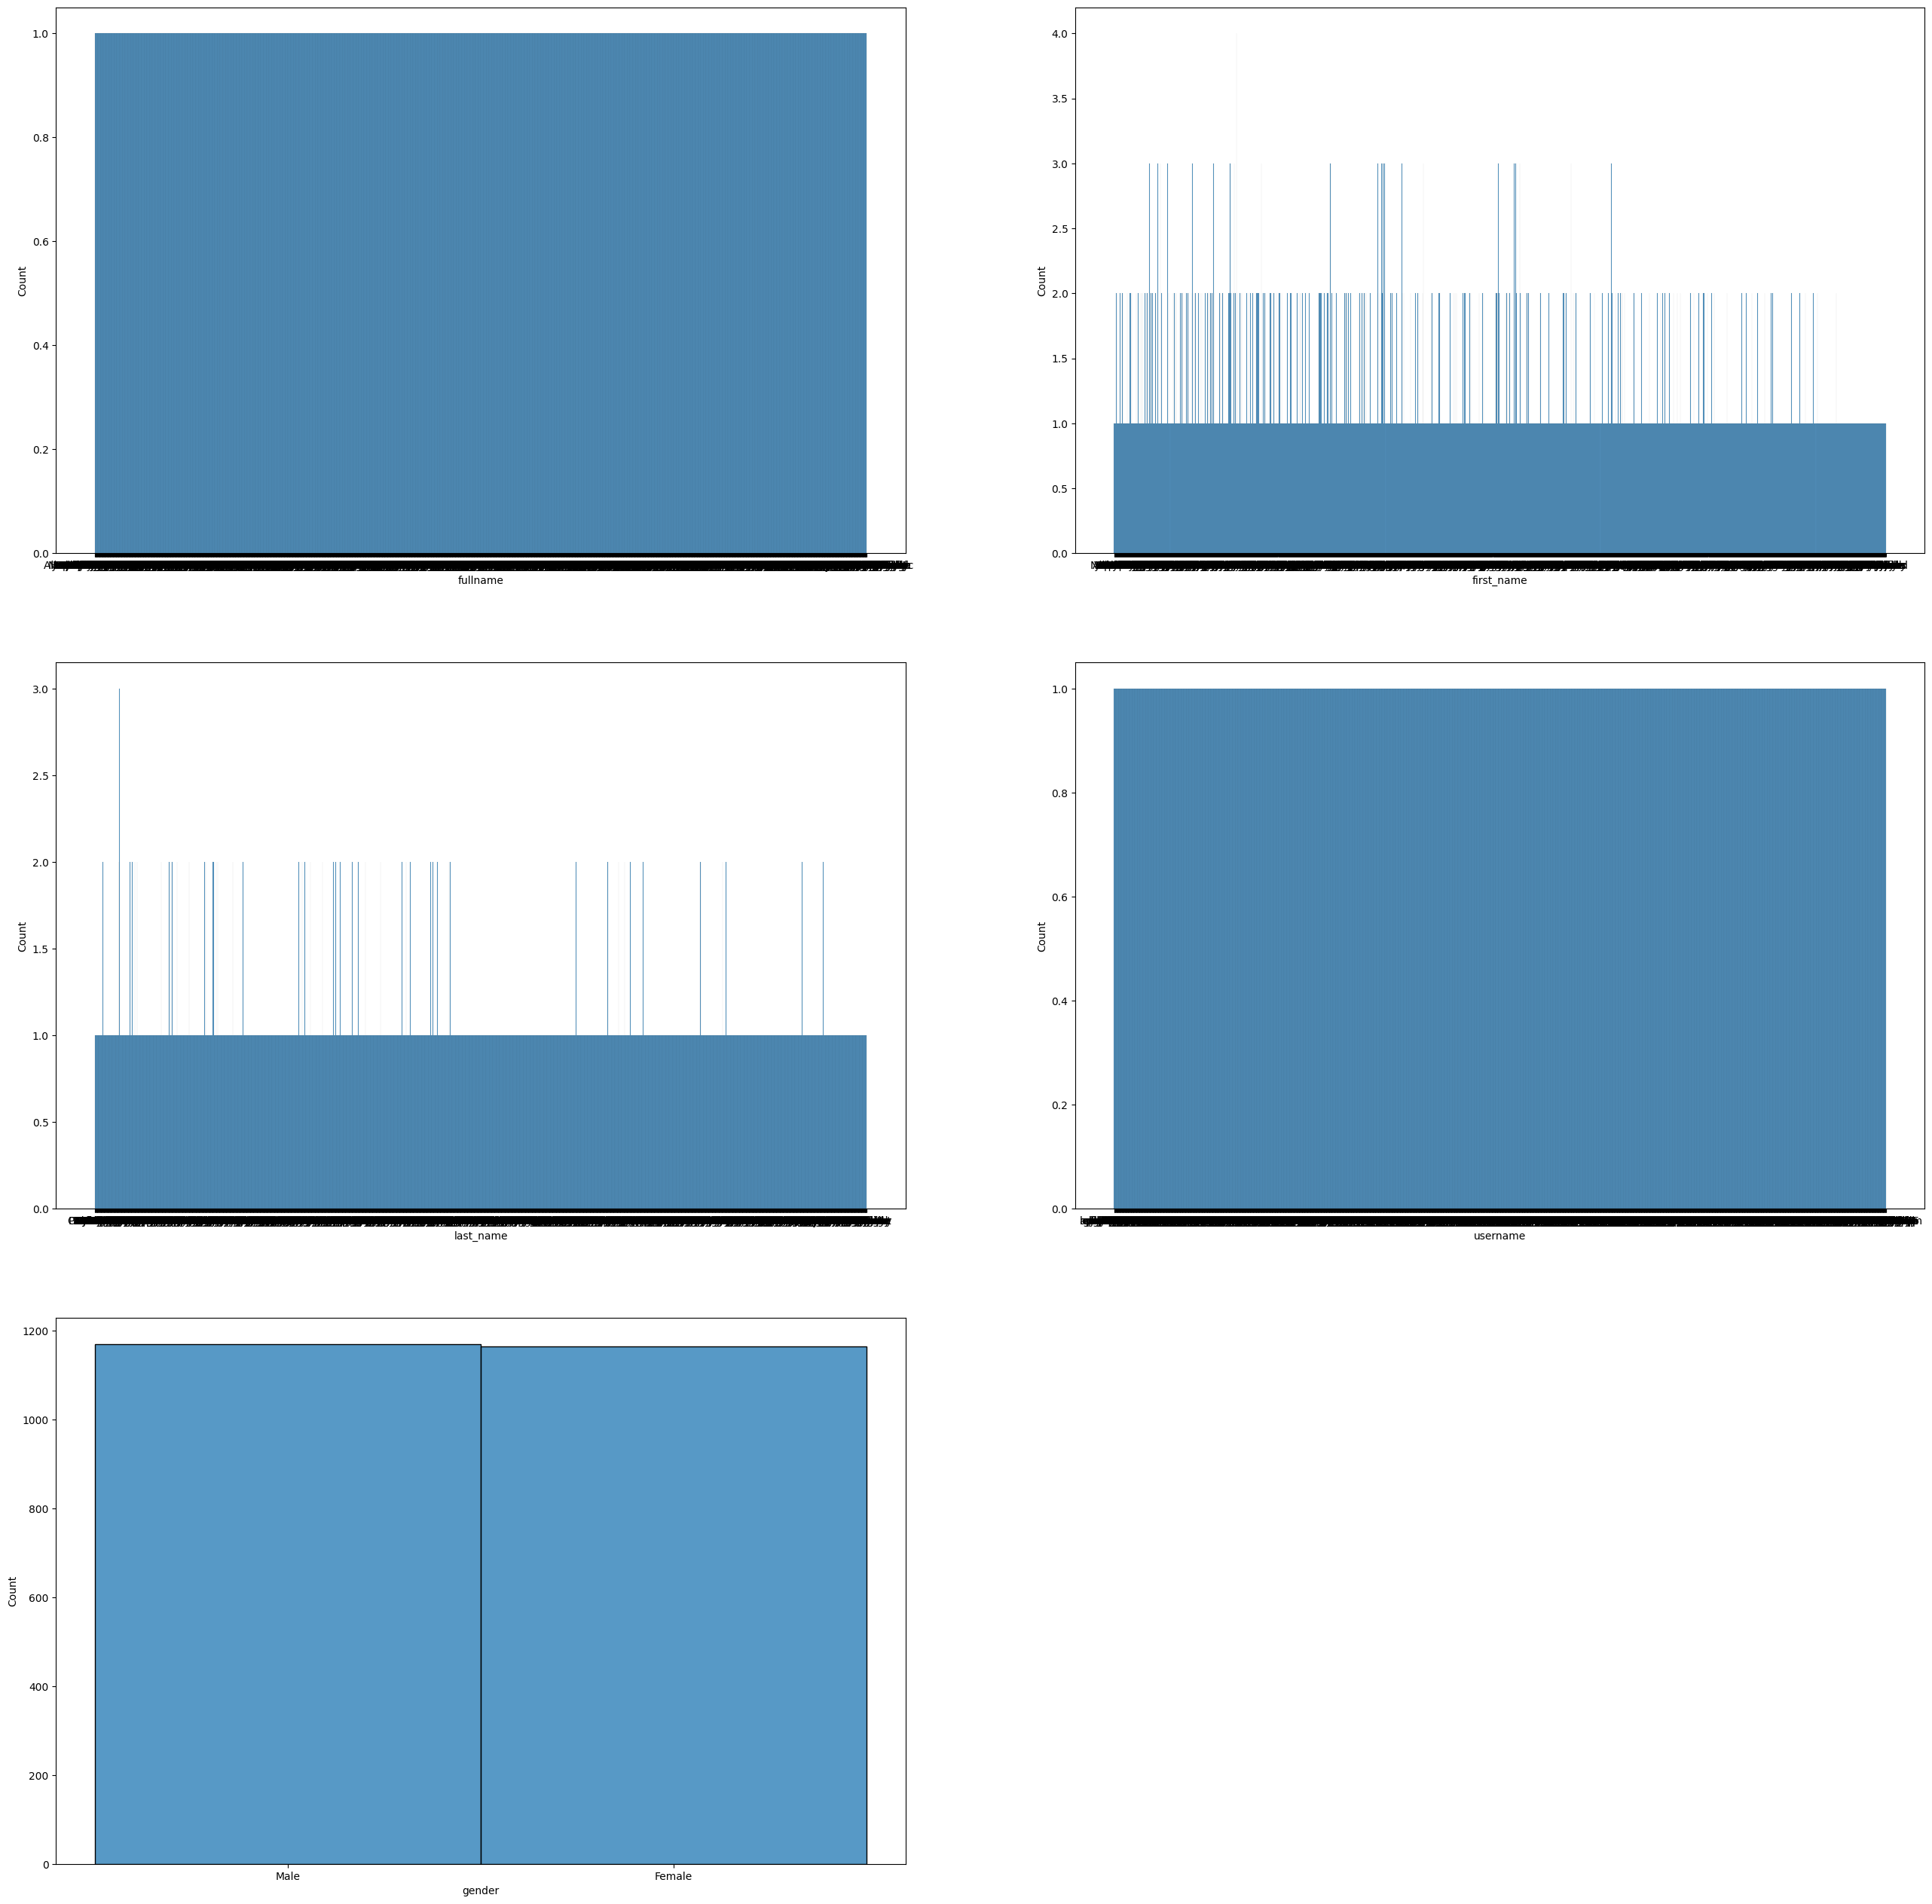

In [11]:
# Check the histogram of the categorical data
fig = plt.figure(figsize=(32, 32))
cols = cat_columns
num_rows = 3
num_cols = 2

for index in range(5):
    fig.add_subplot(num_rows, num_cols, index + 1)
    sns.histplot(data=new_data, x=cols[index])
plt.show()

## 5. Feature Engineering


### Handling Cardinality

In [12]:
# Check dataset info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fullname       2334 non-null   object
 1   first_name     2334 non-null   object
 2   last_name      2334 non-null   object
 3   username       2334 non-null   object
 4   gender         2334 non-null   object
 5   num_reactions  2334 non-null   int64 
 6   num_comments   2334 non-null   int64 
 7   num_shares     2334 non-null   int64 
 8   num_likes      2334 non-null   int64 
 9   num_loves      2334 non-null   int64 
 10  num_wows       2334 non-null   int64 
 11  num_hahas      2334 non-null   int64 
 12  num_sads       2334 non-null   int64 
 13  num_angrys     2334 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 255.4+ KB


In [13]:
# Defining Numerical and Categorical Columns in data
cat_columns = new_data.select_dtypes(include=['object']).columns.tolist()
num_columns = new_data.select_dtypes(include=np.number).columns.tolist()

print('numerical', num_columns)
print('Categorical', cat_columns)

numerical ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
Categorical ['fullname', 'first_name', 'last_name', 'username', 'gender']


In [14]:
# Making empty list for appending the unique values
cat_columns_unique = []
# Inspect the Number of Different Labels, for Different Categorical Variables
for cat in cat_columns:
    cat_columns_unique.append([cat, new_data[cat].nunique()])
# Showing dataframe consisting 
pd.DataFrame(data=cat_columns_unique, columns=['categorical_column', 'unique_value'])

,categorical_column,unique_value
0,fullname,2334
1,first_name,2046
2,last_name,2277
3,username,2334
4,gender,2


### Handling Missing Value

In [15]:
# Check null in dataset
new_data.isnull().sum()

fullname         0
first_name       0
last_name        0
username         0
gender           0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

**penjelasan** :  
 kita dapat melihat bahwa **tidak ada lagi nilai yang hilang** dalam data. Sekarang kita bisa beralih ke penanganan outlier

### Handling Outliers

Untuk memudahkan penanganannya, kita akan membuat fungsi untuk membagi setiap kolom menjadi `kolom terdistribusi normal`, dan `kolom terdistribusi miring` dengan penjelasan lebih lanjut apakah kolom tersebut memiliki **kemiringan rendah atau tinggi**

In [16]:
# Let's capture the first letter of country

new_data['gender'] = new_data['gender'].astype(str).str[0]

print(new_data[['gender', 'gender']].head())
print('Number of categories in the variable gender : {}'.format(len(new_data.gender.unique())))

  gender gender
0      M      M
1      M      M
2      M      M
3      M      M
4      F      F
Number of categories in the variable gender : 2


In [17]:
new_data

,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,Albrecht Consadine,Albrecht,Consadine,aconsadinere,M,1360,1358,597,978,278,98,5,0,1
1,Hayes Patriskson,Hayes,Patriskson,hpatrisksonkl,M,2273,2,6,2273,0,0,0,0,0
2,Napoleon McVicar,Napoleon,McVicar,nmcvicar2v,M,197,540,261,170,27,0,0,0,0
3,Simeon Kenan,Simeon,Kenan,skenan4f,M,55,785,83,42,10,1,1,1,0
4,Laraine Frenzel;,Laraine,Frenzel;,lfrenzelmr,F,216,679,191,160,52,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Olenolin Badcock,Olenolin,Badcock,obadcockom,M,758,24,3,758,0,0,0,0,0
2330,Letty Sitlington,Letty,Sitlington,lsitlingtonbi,F,27,0,0,27,0,0,0,0,0
2331,Lucas Billsberry,Lucas,Billsberry,lbillsberry55,M,0,0,0,0,0,0,0,0,0
2332,Mathias Slobom,Mathias,Slobom,mslobom1b,M,0,0,0,0,0,0,0,0,0


In [18]:
# Making data and columns for normal distribution
data_normal = []
column_normal = []

# Making data and columns for skewed distribution
data_skewed = []
column_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for num in num_columns:
    skewness = new_data[num].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    # Elif the data has low skewness
    elif skewness < -0.5 and skewness > -1: 
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Elif the data has low skewness
    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Elif the data has high skewness
    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

In [19]:
# Showing normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness


**penjelasan** :  

tabel di atas menunjukkan bahwa `tidak ada`  satu-satunya kolom dengan **distribusi normal**

In [20]:
# Showing skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,num_reactions,3.386175,high
1,num_comments,5.376887,high
2,num_shares,4.293990,high
3,num_likes,3.825376,high
4,num_loves,3.447320,high
5,num_wows,11.359114,high
6,num_hahas,14.235111,high
7,num_sads,11.487102,high
8,num_angrys,4.047137,high


**penjelasan** :

tabel di atas menunjukkan bahwa **sebagian besar kolom memiliki kemiringan yang tinggi** ada `8` kolom dengan **kemiringan tinggi**

In [21]:
# List low variation column
low_variation_column = ['num_sads','num_angrys']
# Drop column with low variation in skewed column and append it into normal column
for col in low_variation_column:
    column_skewed.remove(col)
    column_normal.append(col)

In [22]:
# Capping Method for Normal Distribution  
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=column_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
new_data_capped = winsorizer_normal.fit_transform(new_data)

**penjelasan** :

membatasi **kolom terdistribusi normal** dan **kolom varians rendah**

In [23]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=column_skewed)

# Fit & Transforming X_train 
new_data_capped = winsorizer_skewed.fit_transform(new_data)

**penjelasan** :

membatasi **kolom terdistribusi miring**

In [24]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**penjelasan** :

berfungsi untuk menunjukkan perbedaan setiap kolom sebelum dan sesudah penanganan outlier

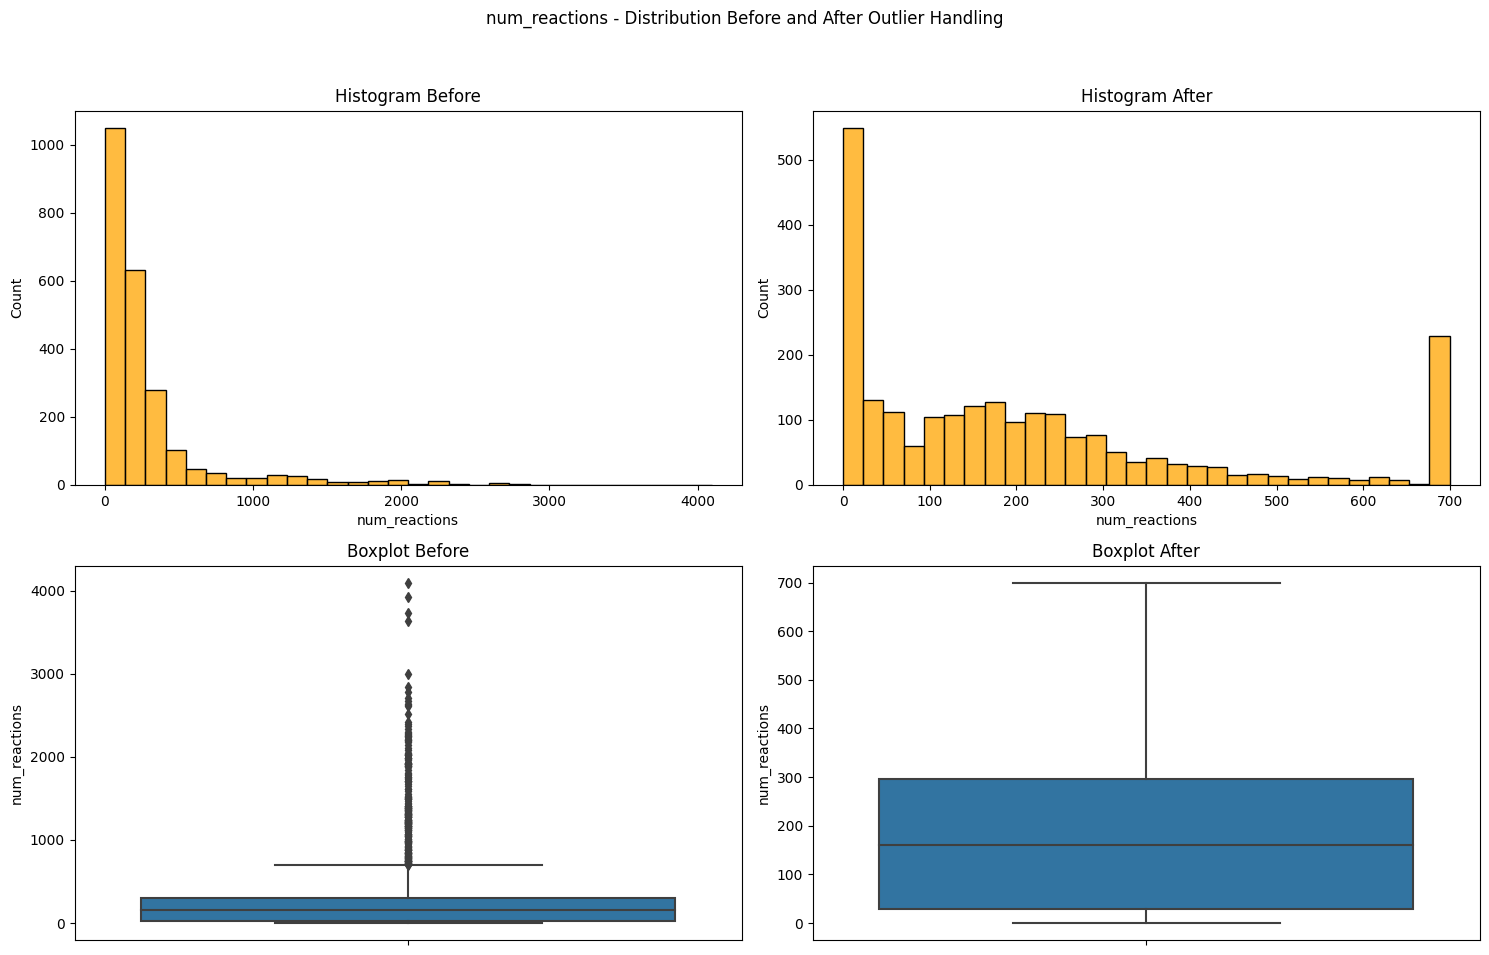

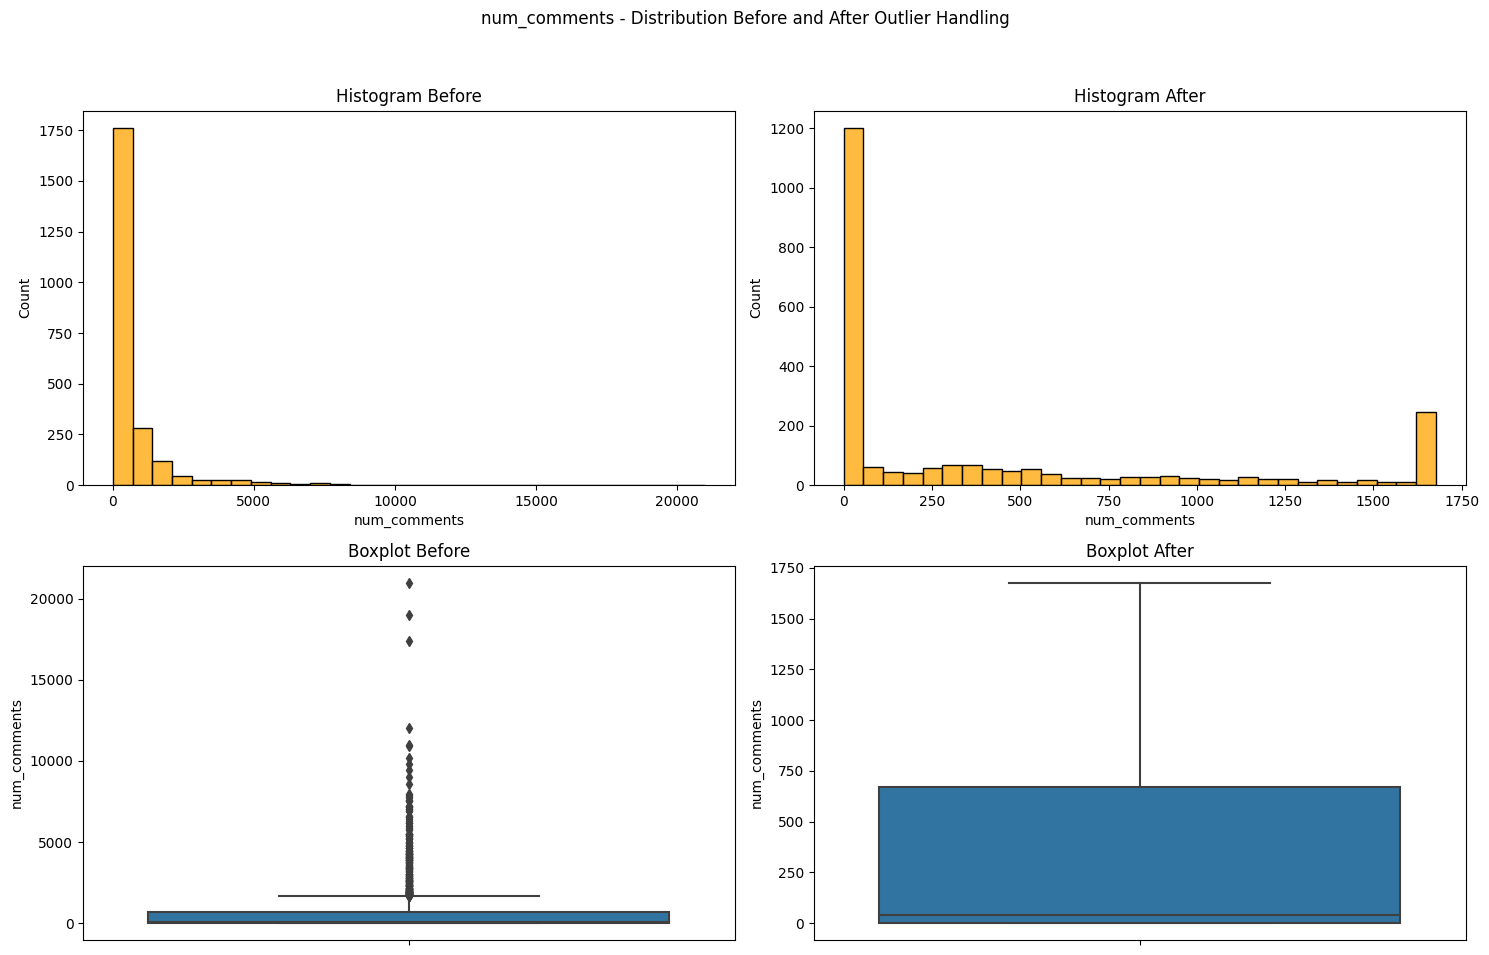

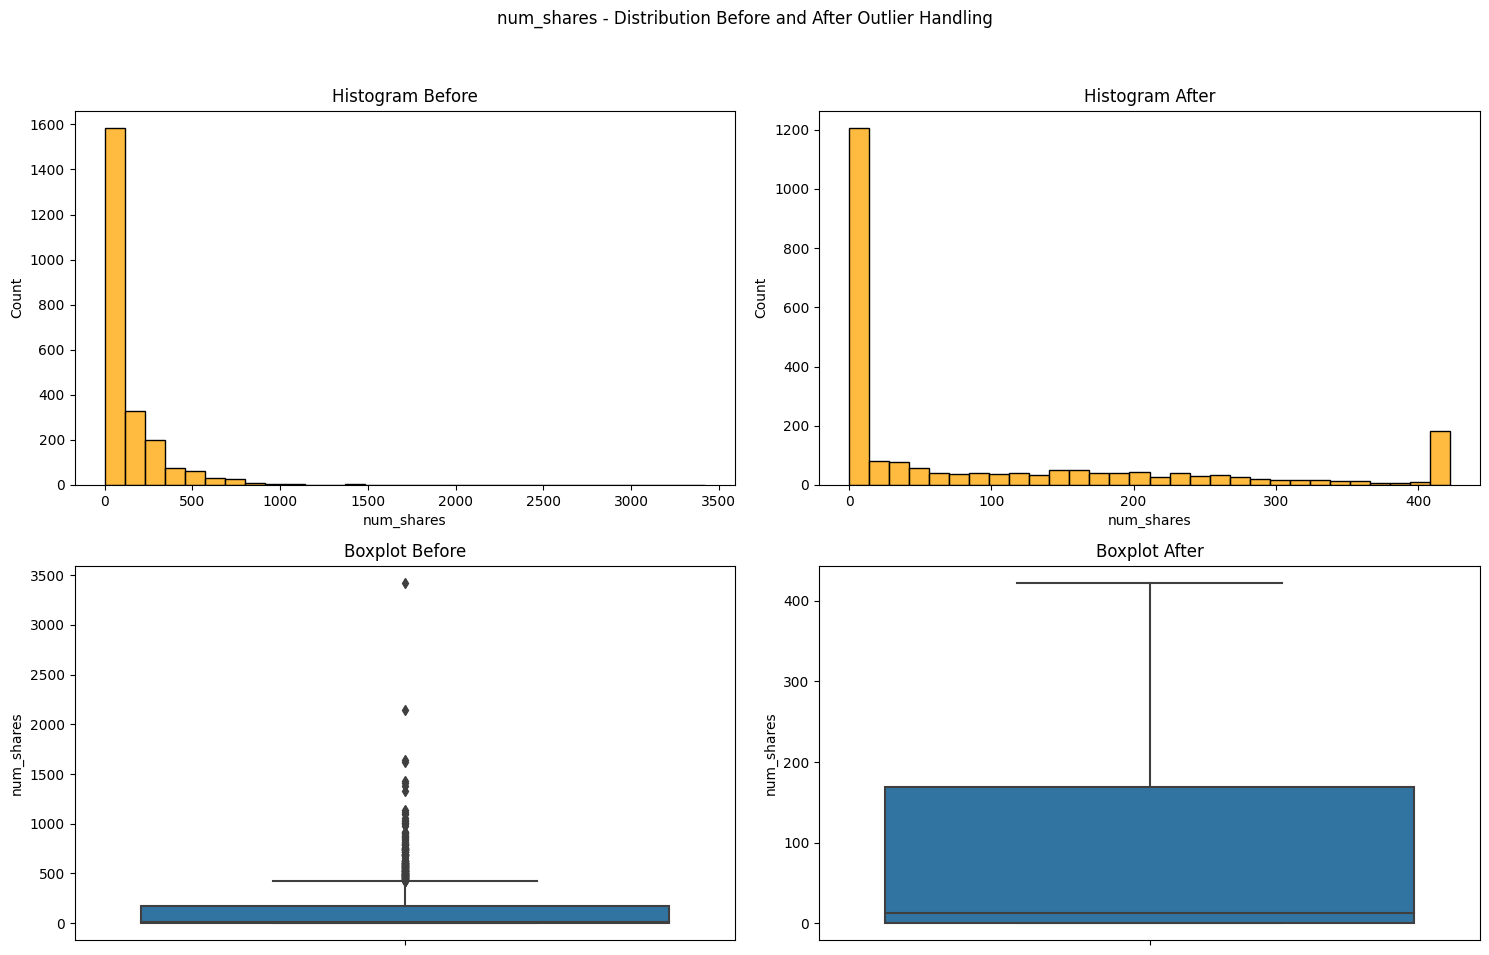

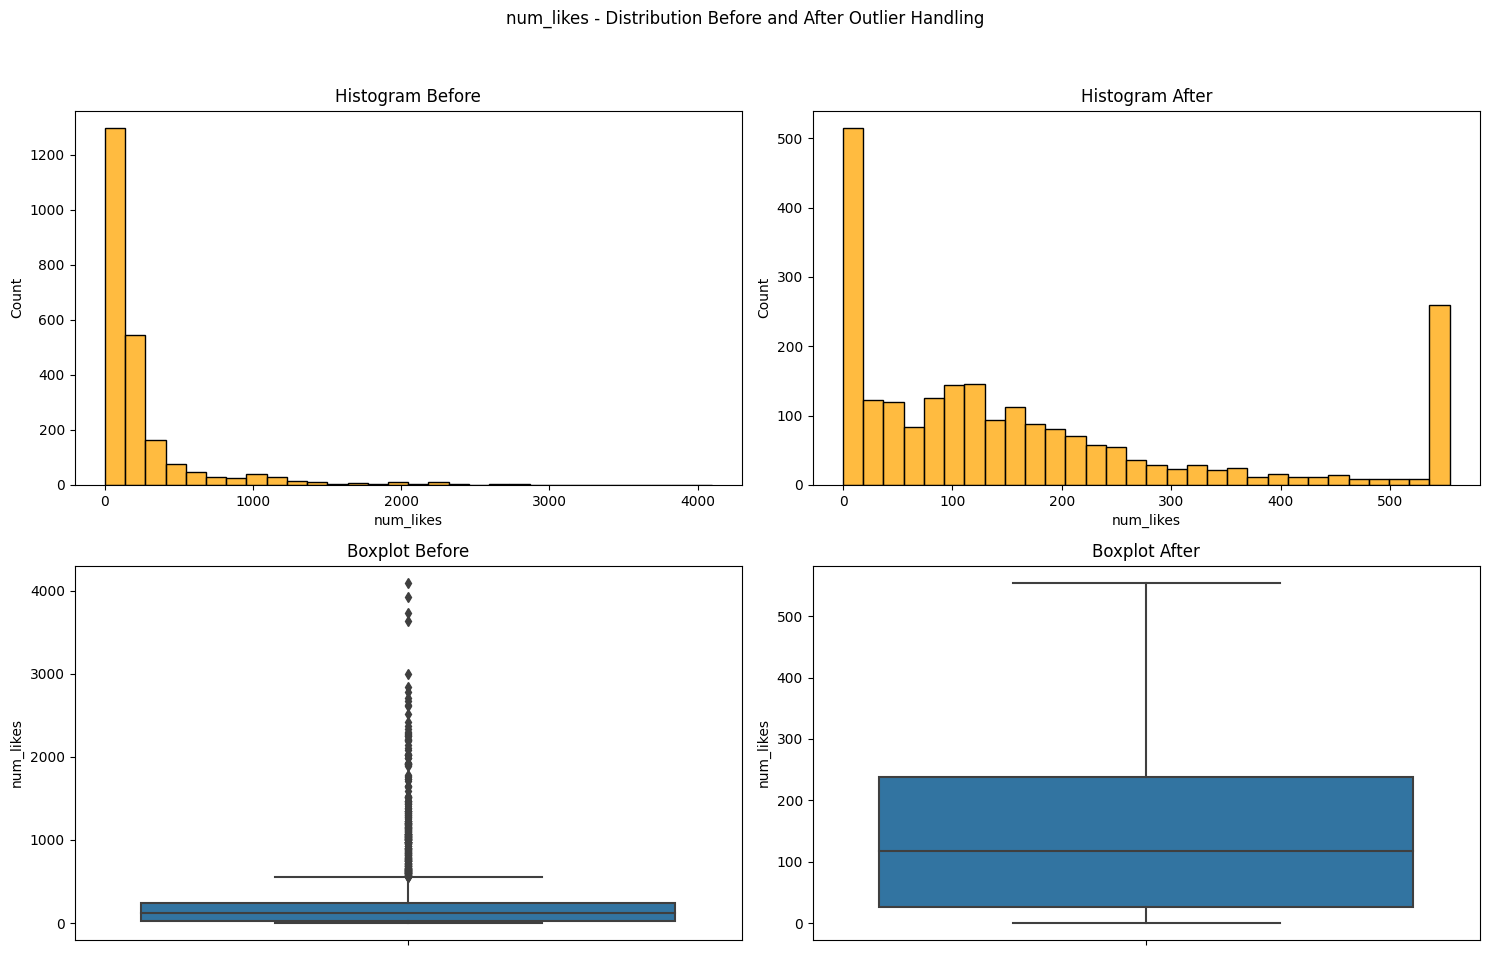

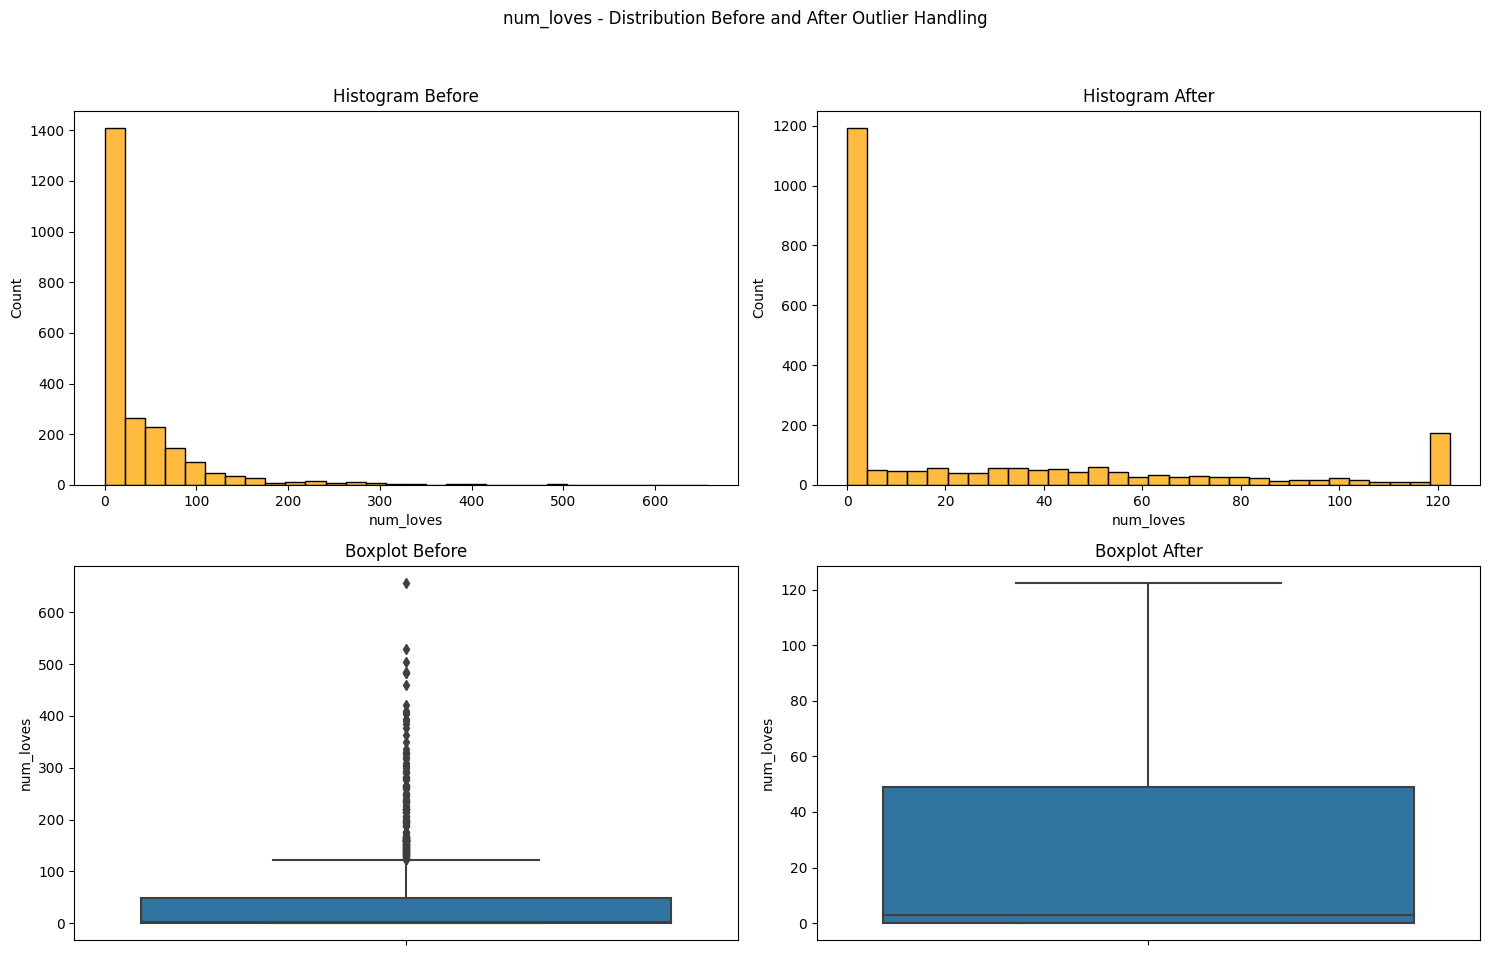

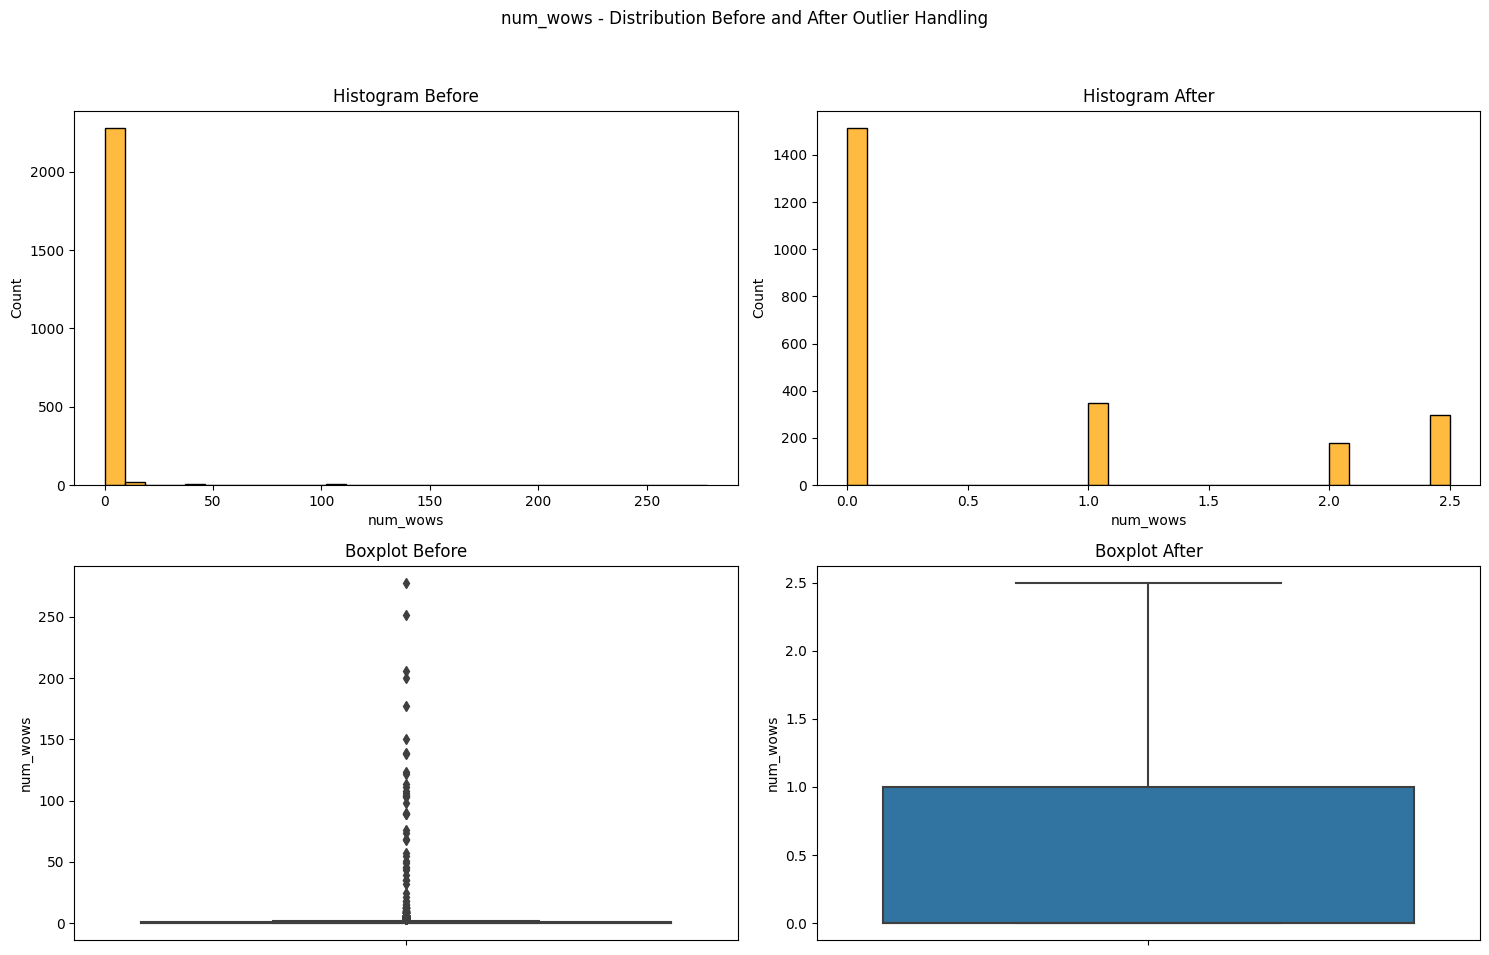

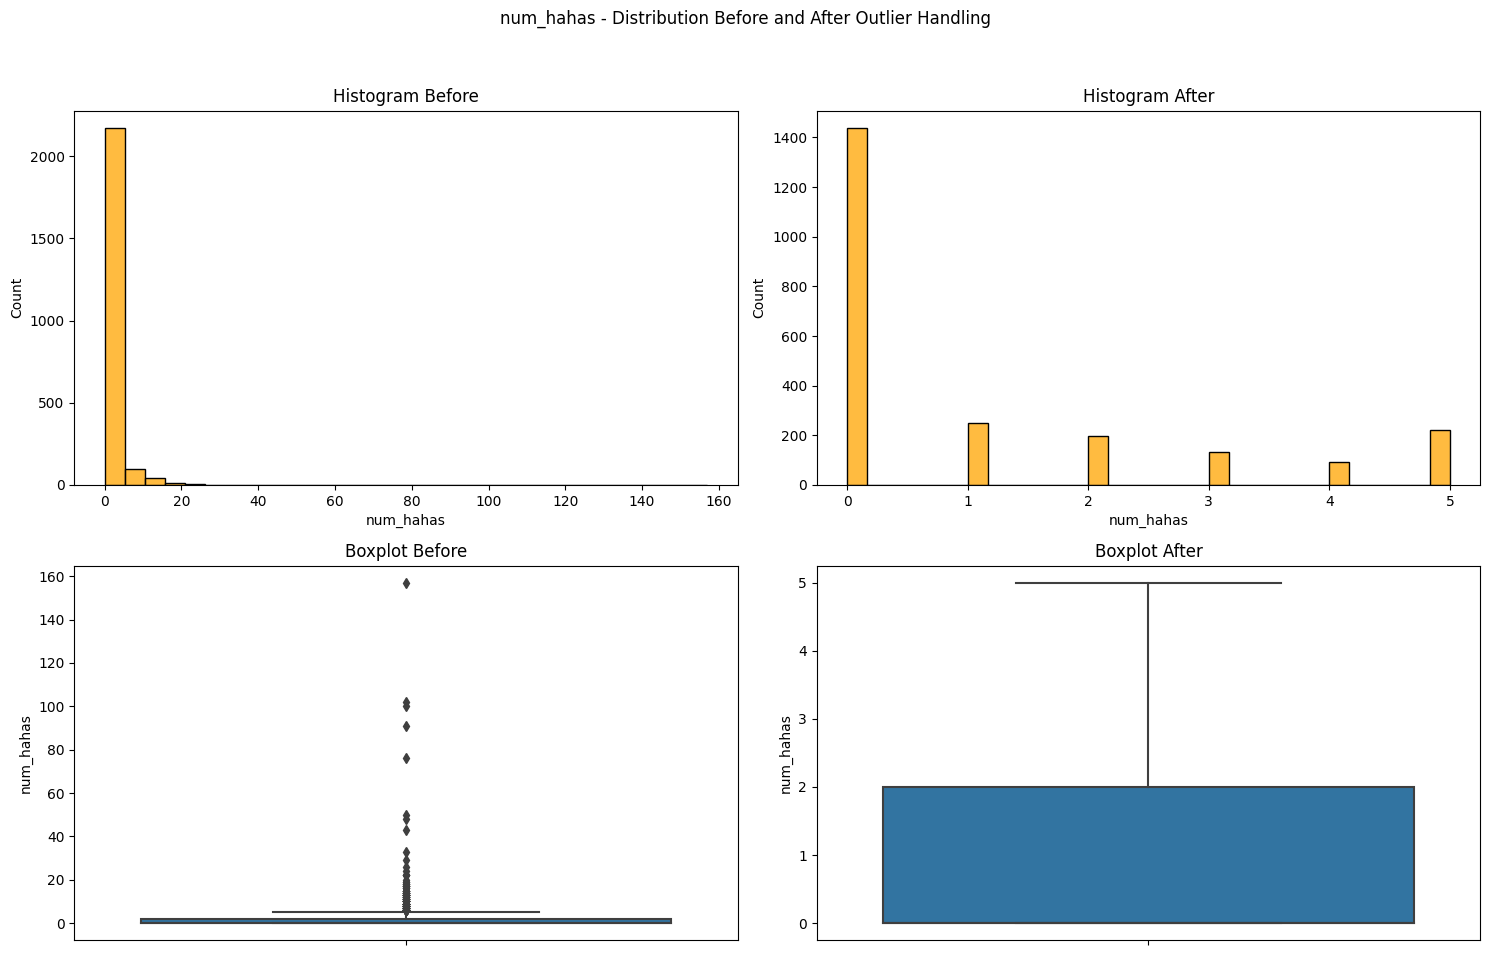

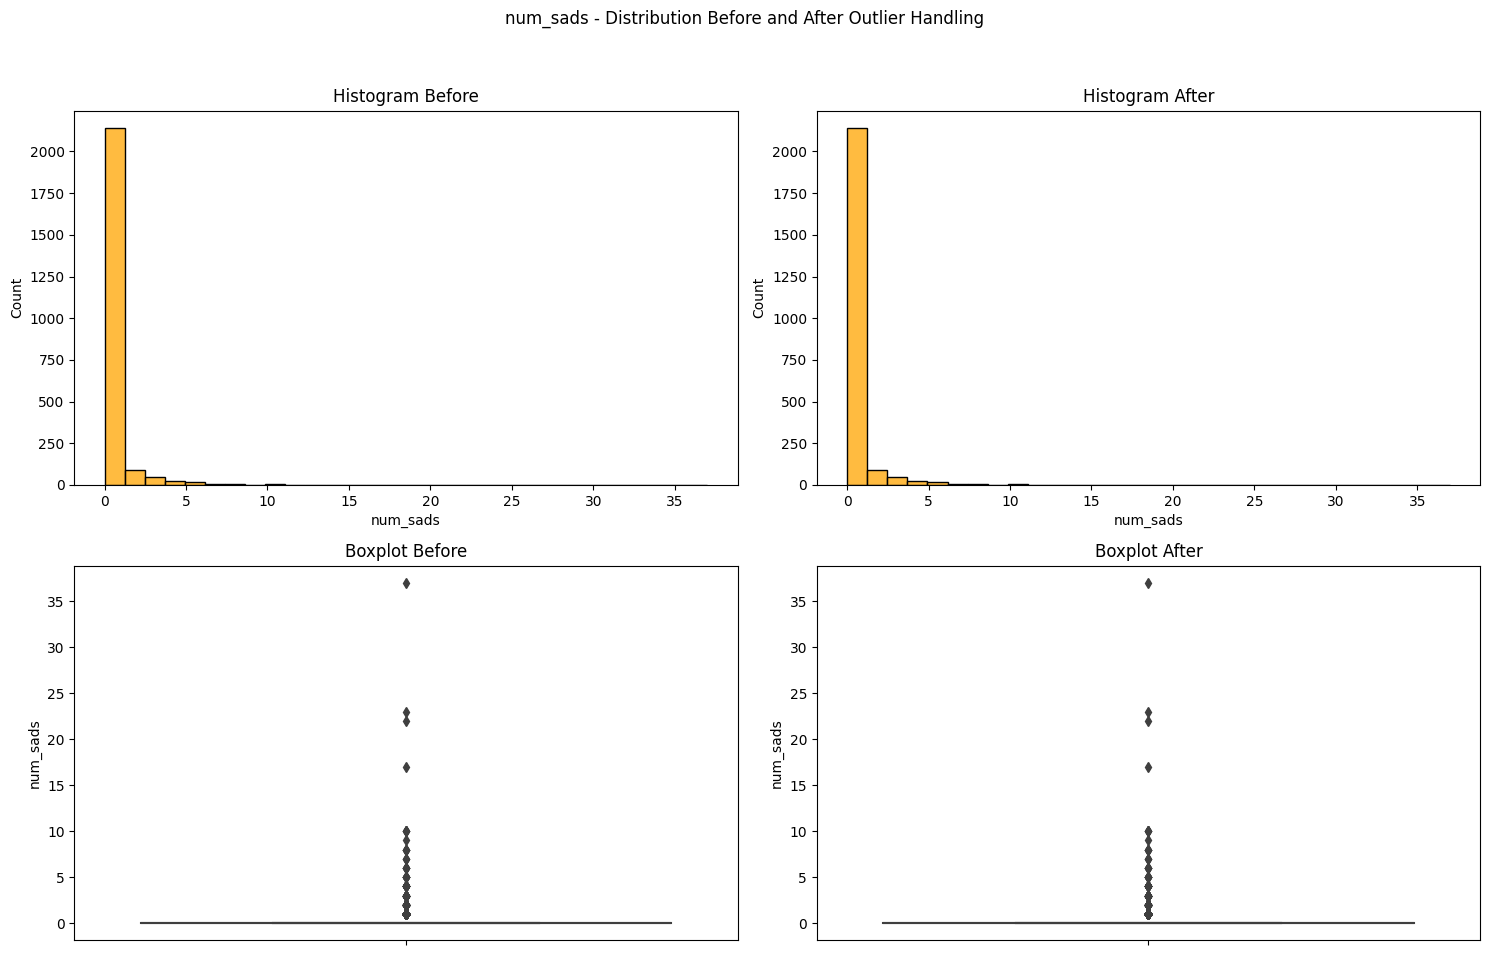

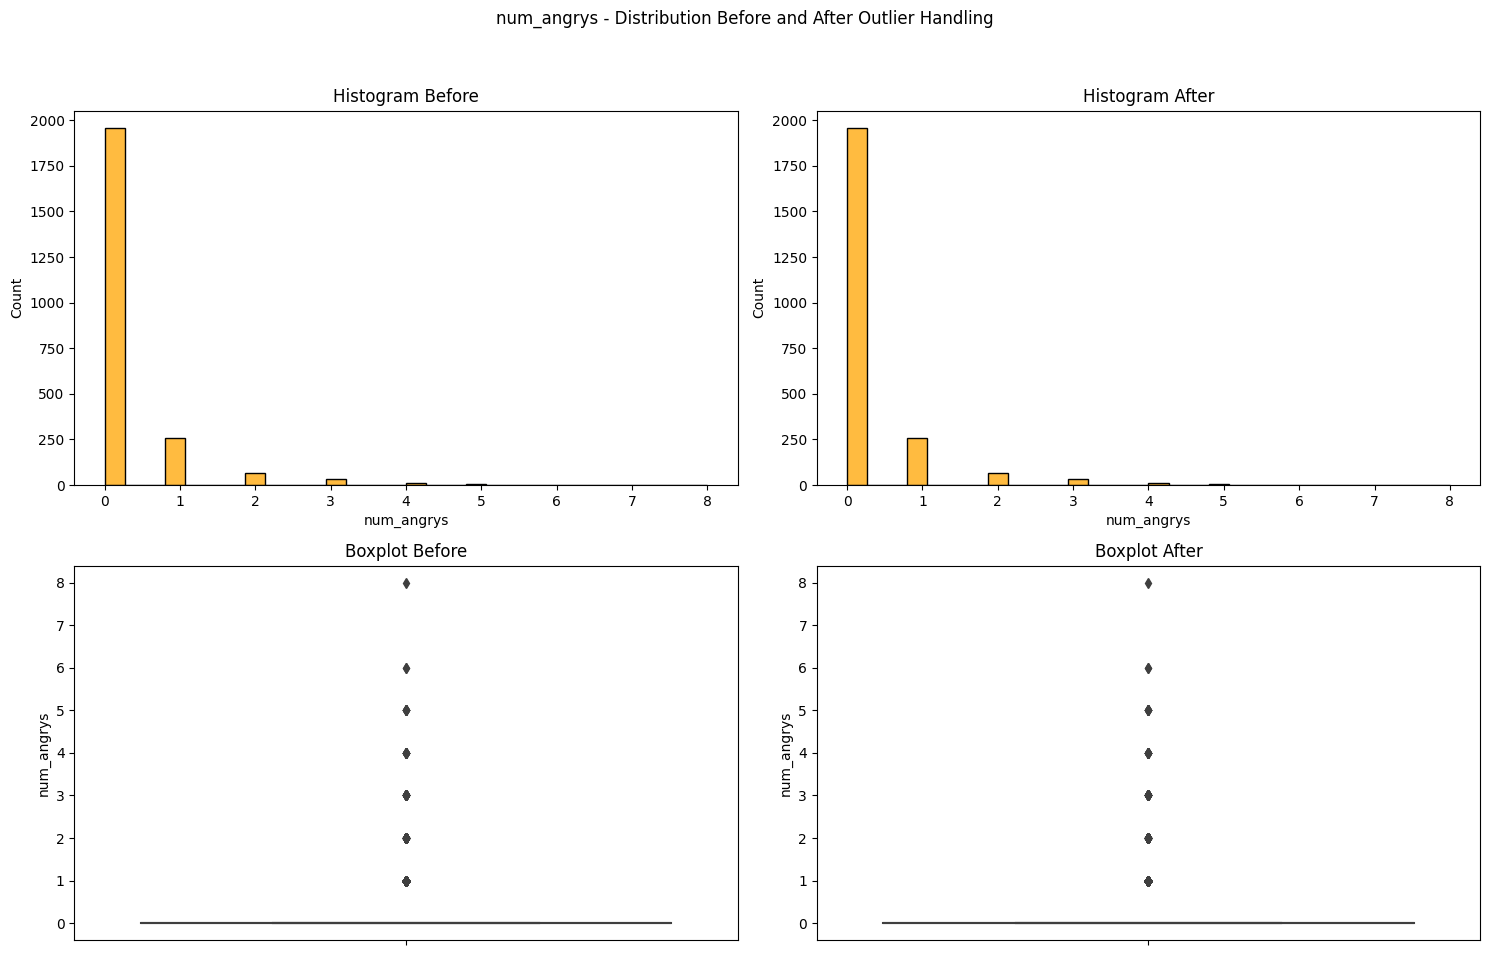

In [25]:
for num in num_columns:
    outlier_handling_plot_comparison(new_data, new_data_capped, num)

### Splitting Numerical and Categorical Data

After handling outliers, we are going to **split the data** into a categorical and numerical column for `scaling` and `encoding`

In [26]:
# Splitting Numerical and Categorical Columns
new_data_num = new_data_capped[num_columns]
new_data_cat = new_data_capped[cat_columns]

new_data_num.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,699.5,1358.0,422.5,554.5,122.5,2.5,5,0,1
1,699.5,2.0,6.0,554.5,0.0,0.0,0,0,0
2,197.0,540.0,261.0,170.0,27.0,0.0,0,0,0
3,55.0,785.0,83.0,42.0,10.0,1.0,1,1,0
4,216.0,679.0,191.0,160.0,52.0,2.0,2,0,0


In [27]:
new_data_cat.head()

,fullname,first_name,last_name,username,gender
0,Albrecht Consadine,Albrecht,Consadine,aconsadinere,M
1,Hayes Patriskson,Hayes,Patriskson,hpatrisksonkl,M
2,Napoleon McVicar,Napoleon,McVicar,nmcvicar2v,M
3,Simeon Kenan,Simeon,Kenan,skenan4f,M
4,Laraine Frenzel;,Laraine,Frenzel;,lfrenzelmr,F


### Scaling

Saat bekerja dengan **algoritme pengelompokan** seperti **KMeans**, kita akan menggunakan `Standard Scaler` untuk penskalaan

In [28]:
# # Feature Scaling using StandardScaler


scaler = StandardScaler()
scaler.fit(new_data_num)

new_data_scaled = scaler.transform(new_data_num)

new_data_scaled

array([[ 2.28207623,  1.62972689,  2.39195136, ...,  2.33230097,
        -0.28009405,  1.04803993],
       [ 2.28207623, -0.71718608, -0.67138085, ..., -0.64852833,
        -0.28009405, -0.35697167],
       [-0.07081328,  0.21396376,  1.20412867, ..., -0.64852833,
        -0.28009405, -0.35697167],
       ...,
       [-0.99323962, -0.72064761, -0.71551049, ..., -0.64852833,
        -0.28009405, -0.35697167],
       [-0.99323962, -0.72064761, -0.71551049, ..., -0.64852833,
        -0.28009405, -0.35697167],
       [-0.98387488, -0.72064761, -0.71551049, ..., -0.64852833,
        -0.28009405, -0.35697167]])

**penjelasan** :

angka di atas menunjukkan data berskala

In [29]:
# Concate Columns
new_data_final = np.concatenate([new_data_scaled], axis=1)

new_data_final.shape

(2334, 9)

**penjelasan** :

kumpulan data akhir setelah rekayasa fitur memiliki:
* `2334 entri` data
* `9 kolom` data

Sekarang kita dapat beralih ke pengelompokan data

## 6. Model Evaluation

Untuk pengelompokan kita akan menggunakan model `K-Means` dengan menentukan jumlah cluster, jadi kita akan menggunakan `Dimensionality Reduction` untuk mengurangi jumlah fitur sambil tetap mempertahankan informasi penting, lalu menentukan jumlahnya cluster dengan `Elbow Method` dan `Silhouette Plot`

### Dimensionality Reduction

Seiring bertambahnya jumlah fitur (kolom), muncul berbagai masalah dan kompleksitas yang dapat berdampak negatif pada performa dan kemampuan interpretasi model. Jadi kita akan menggunakan `PCA Dimensionality Reduction` untuk membantu **menghilangkan fitur-fitur yang kurang penting sambil mempertahankan pola dan hubungan penting**

In [30]:
pca = PCA()
pca.fit(new_data_final)

PCA()

**penjelasan** :

menyesuaikan kumpulan data akhir ke dalam model

Text(0, 0.5, 'Eigenvalues')

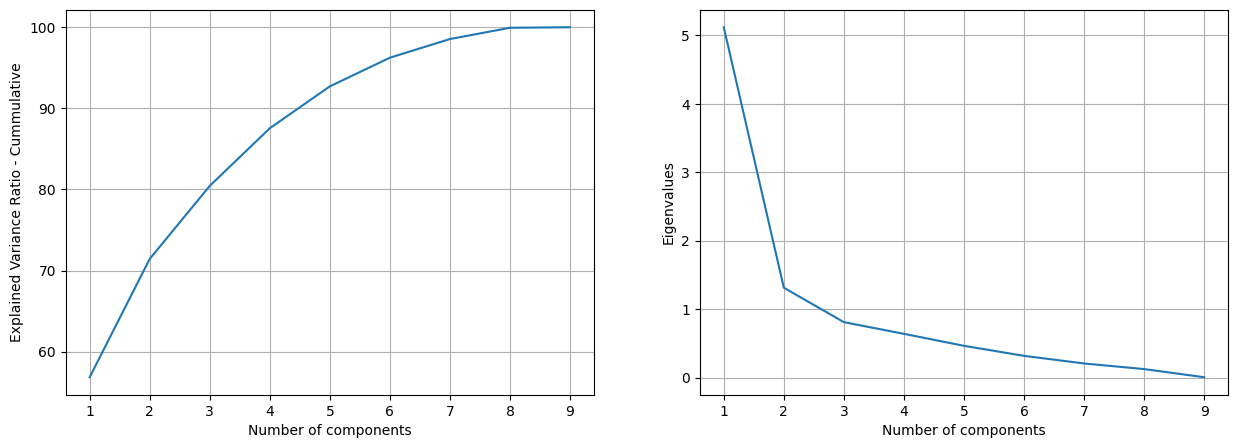

In [31]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 10), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 10), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [32]:
# Check the number of features if we want to retain 85 % of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.85) + 1
num_features

4

**penjelasan** :

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jika kita memilih **jumlah komponen sebanyak 4**, kita dapat menyimpan lebih dari `85%` informasinya.

In [33]:
# Let's train the model with 85 % of the original dataset information
pca = PCA(n_components=0.85)
pca.fit(new_data_final)

new_data_pca = pca.transform(new_data_final)

**penjelasan** :

train model dengan `85%` informasi set data aslinya

#### Elbow Method

Untuk menemukan **jumlah cluster optimal**, kita akan menggunakan `Elbow Method`

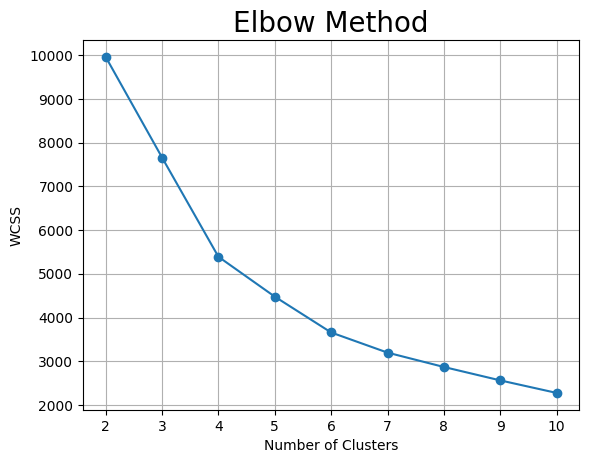

In [34]:
wcss = []
random_state = 10
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(new_data_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**keterangan** :

Dari visualisasi di atas kita dapat melihat bahwa **penurunan inersia tidak lagi signifikan** setelah `3 Cluster`

#### Silhouette Plot

Setelah metode siku, kita dapat menggunakan `silhouette plot` untuk **memvisualisasikan cluster** berdasarkan jumlah cluster dan menentukan **jumlah cluster mana yang lebih baik**.

Kami juga akan menghitung skor siluet untuk mengetahui kualitas cluster yang dihasilkan oleh algoritma clustering, skor siluet berkisar antara -1 hingga 1, dimana:

* 1: menunjukkan bahwa cluster-cluster tersebut berjauhan satu sama lain dan dapat dibedakan dengan jelas.
* 0: menunjukkan cluster yang tumpang tindih.
* -1: menunjukkan pengelompokan yang salah.

In [35]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.5221335064450704
For n_clusters = 3 The average silhouette_score is : 0.46283389459115953
For n_clusters = 4 The average silhouette_score is : 0.5440234091969548
For n_clusters = 5 The average silhouette_score is : 0.5462336965630399
For n_clusters = 6 The average silhouette_score is : 0.5273424752122895
For n_clusters = 7 The average silhouette_score is : 0.5167751121493099
For n_clusters = 8 The average silhouette_score is : 0.5160952498877074
For n_clusters = 9 The average silhouette_score is : 0.526094492313359


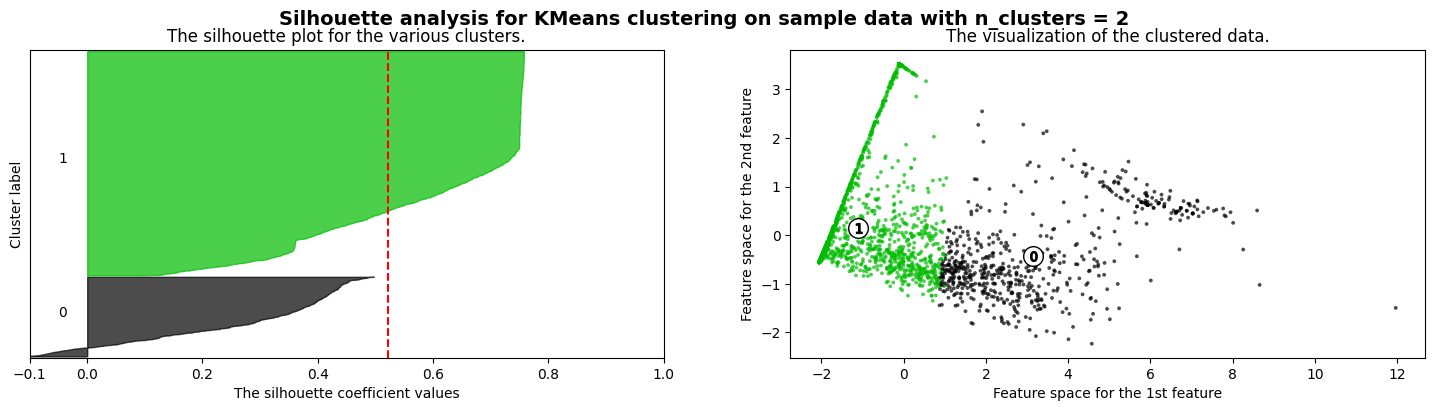

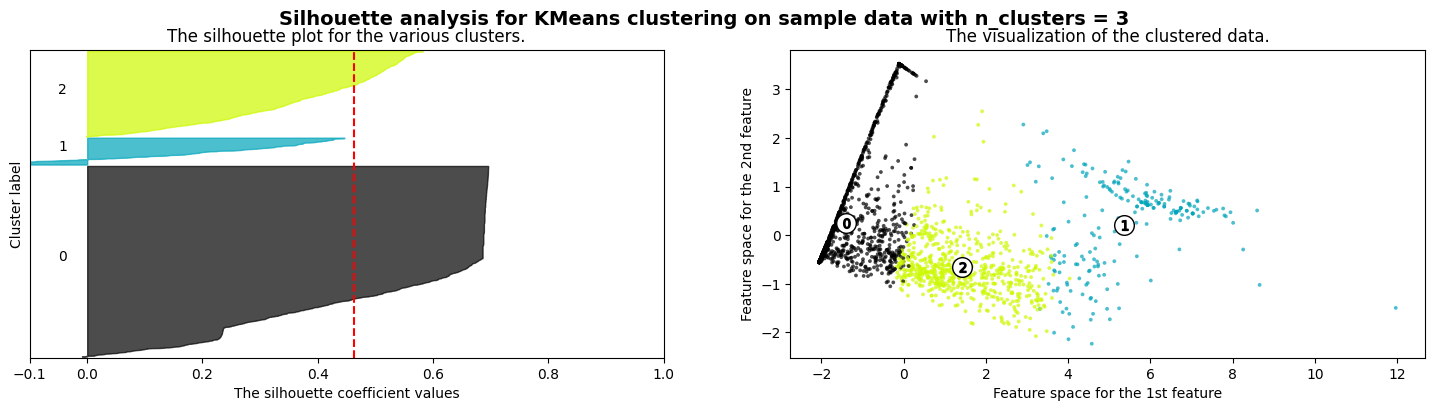

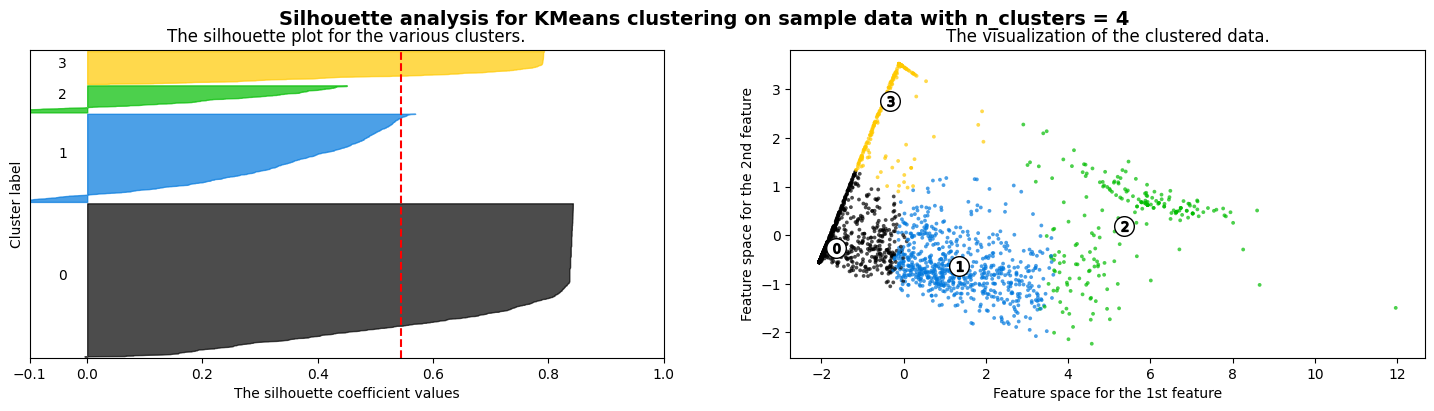

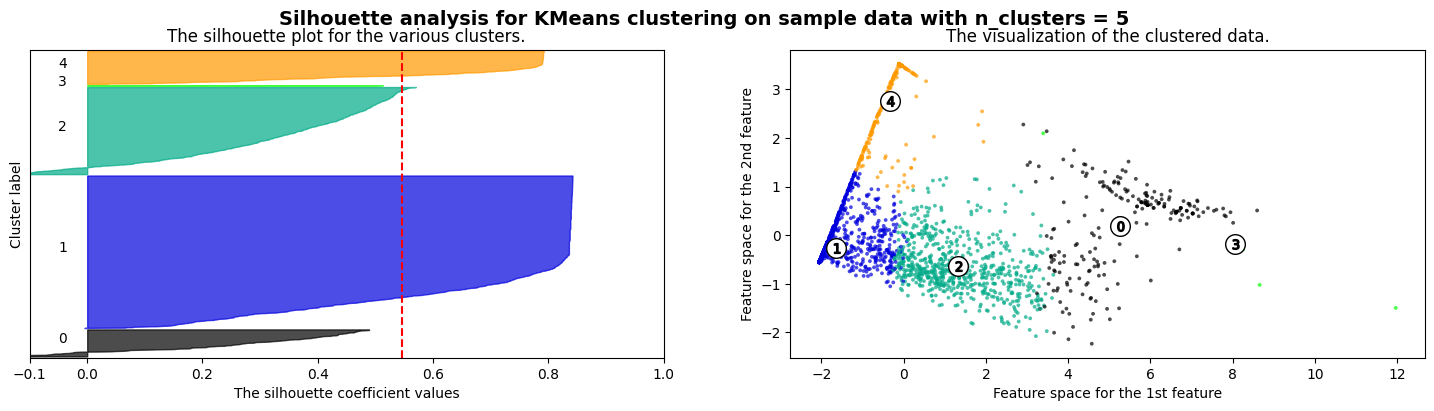

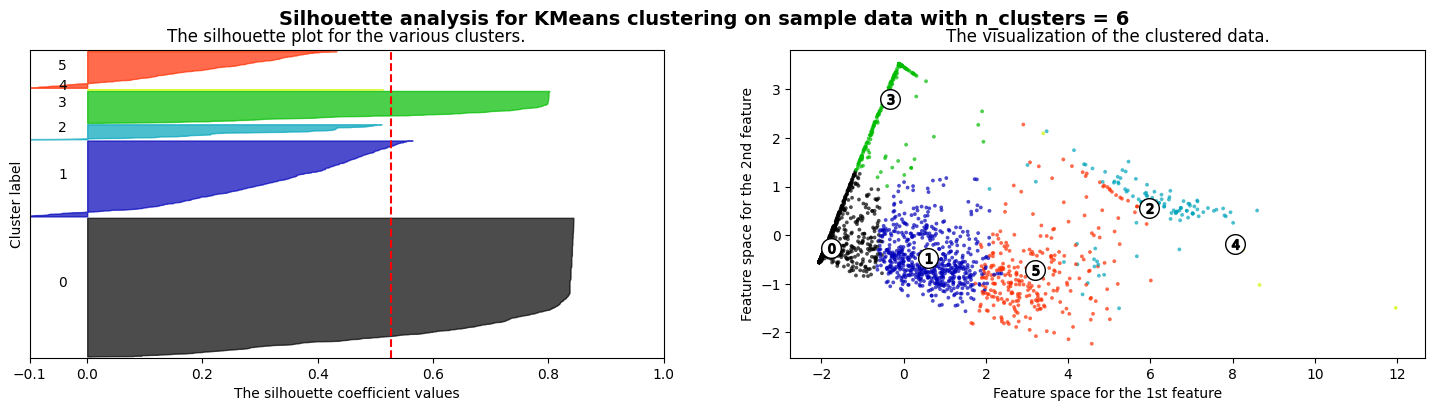

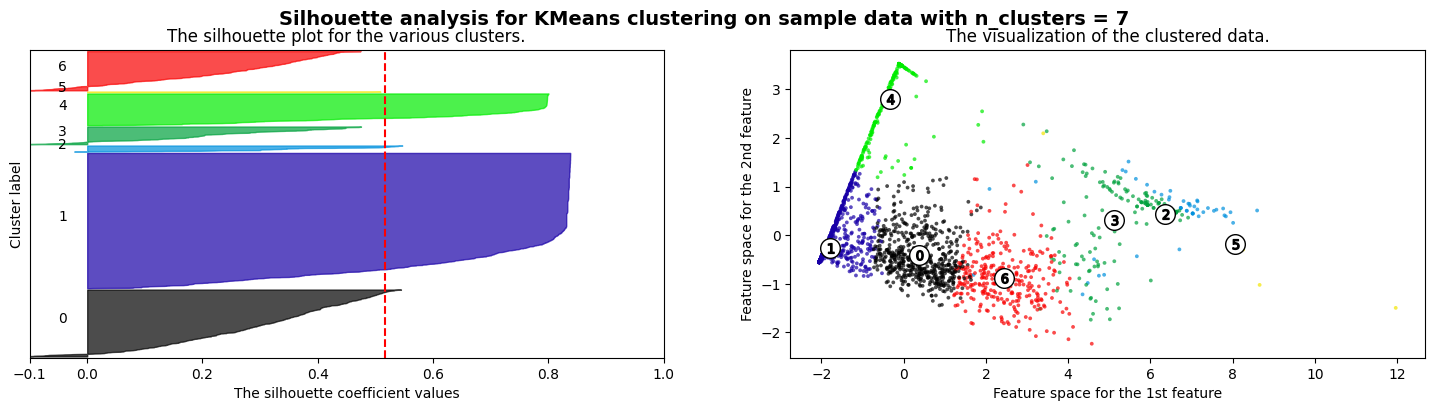

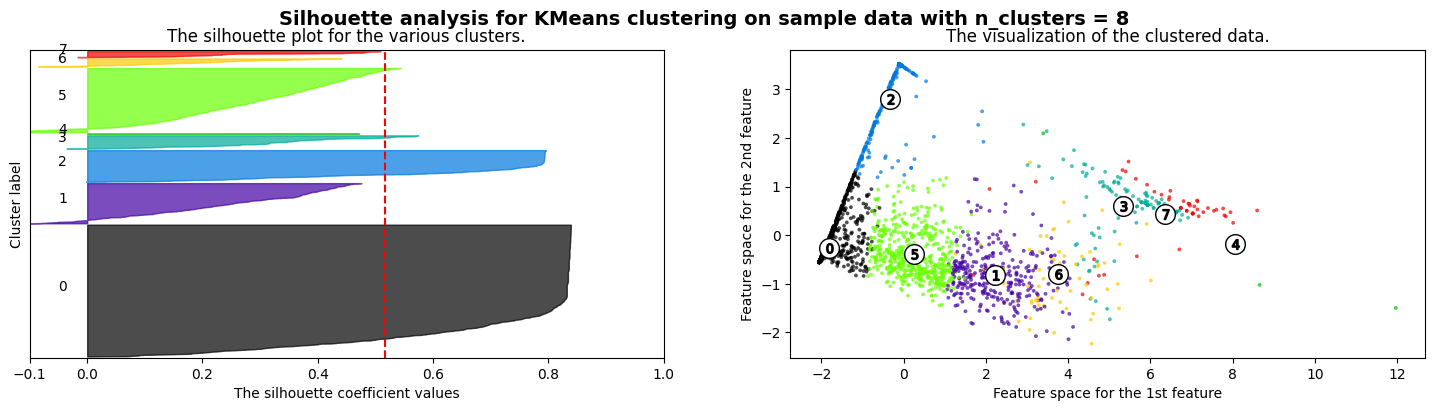

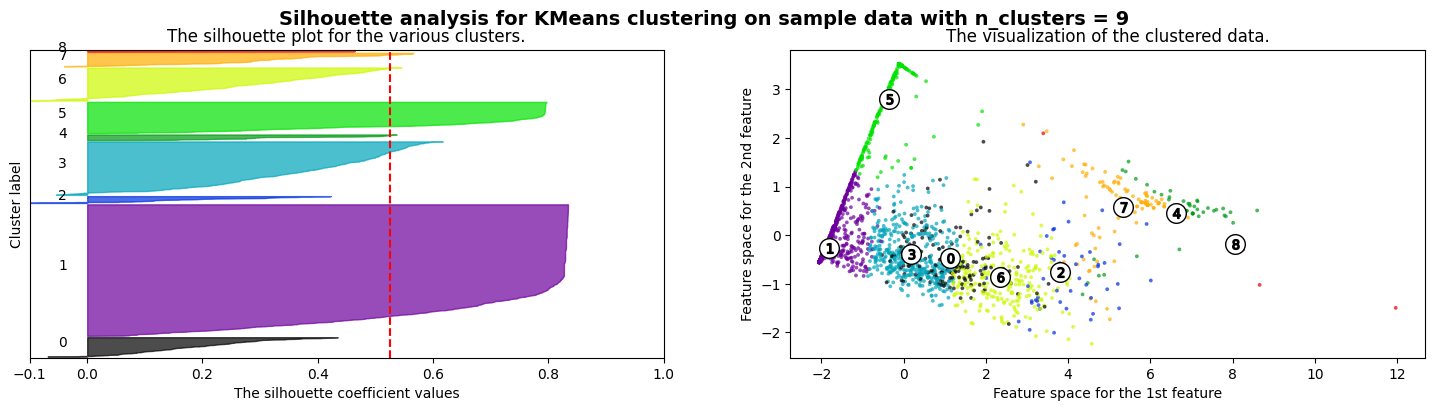

In [36]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), new_data_pca, random_state)

**penjelasan** :

silhouette plot di atas menunjukkan :
- **silhouette score** tertinggi ada pada cluster `2 (0,32)`, cluster `3 (0,32)`, dan cluster `6 (0,32)`
- **best visualization** dari data yang dikelompokkan adalah dengan `3` cluster

sebagai kesimpulan, kita akan menggunakan `3 cluster`

## 7. Model Definition

Dari `Elbow Method` dan `Silhoette Plot` di atas, kita menyimpulkan bahwa jumlah klaster yang optimal adalah **`3`**, sekarang kita dapat beralih ke pelatihan model menggunakan `K-Means` untuk pengelompokan

#### K-Means

In [37]:
# Train with optimal number of clusters
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(new_data_pca)
pred

array([1, 0, 0, ..., 0, 0, 0])

**penjelasan** :

melatih model `K-Means` dengan jumlah cluster optimal yaitu `3` dan memprediksi setiap data berdasarkan **kumpulan data yang dikurangi dimensinya**

In [38]:
# Insert clustering result into original dataset
new_data['CLUSTER'] = pred
new_data


,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,CLUSTER
0,Albrecht Consadine,Albrecht,Consadine,aconsadinere,M,1360,1358,597,978,278,98,5,0,1,1
1,Hayes Patriskson,Hayes,Patriskson,hpatrisksonkl,M,2273,2,6,2273,0,0,0,0,0,0
2,Napoleon McVicar,Napoleon,McVicar,nmcvicar2v,M,197,540,261,170,27,0,0,0,0,0
3,Simeon Kenan,Simeon,Kenan,skenan4f,M,55,785,83,42,10,1,1,1,0,0
4,Laraine Frenzel;,Laraine,Frenzel;,lfrenzelmr,F,216,679,191,160,52,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Olenolin Badcock,Olenolin,Badcock,obadcockom,M,758,24,3,758,0,0,0,0,0,0
2330,Letty Sitlington,Letty,Sitlington,lsitlingtonbi,F,27,0,0,27,0,0,0,0,0,0
2331,Lucas Billsberry,Lucas,Billsberry,lbillsberry55,M,0,0,0,0,0,0,0,0,0,0
2332,Mathias Slobom,Mathias,Slobom,mslobom1b,M,0,0,0,0,0,0,0,0,0,0


**penjelasan** :

membuat kolom baru di dataset dengan cluster yang diprediksi

## 8. Exploratory Data Analysis After Clustering

<Axes: >

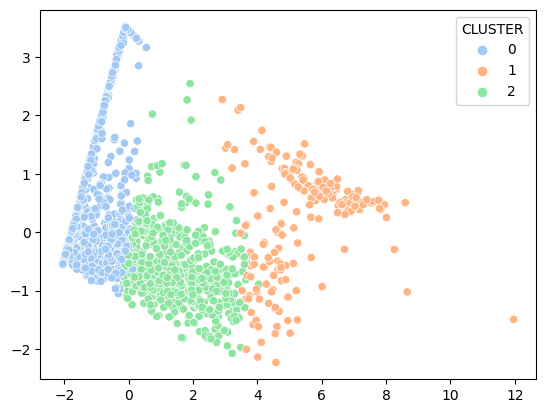

In [39]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=2)
pca_2d.fit(new_data_final)

new_data_final_pca_2d = pca_2d.fit_transform(new_data_final)

sns.scatterplot(x=new_data_final_pca_2d[:,0], y=new_data_final_pca_2d[:,1], hue=new_data['CLUSTER'], palette='pastel')


**penjelasan** :

gambar di atas menunjukkan visualisasi cluster

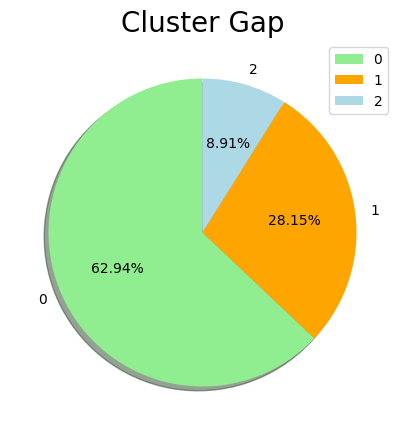

In [40]:
labels = ['0', '1', '2']
size = new_data['CLUSTER'].value_counts()
colors = ['lightgreen', 'orange', 'lightblue']

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Cluster Gap', fontsize = 20)
plt.legend()
plt.show()

**penjelasan** :

gambar di atas menunjukkan:
* `Cluster 0` memiliki mayoritas dengan **62.94%**
* `Cluster 1` hanya sedikit di atas Cluster 2 dengan **8.91%**
* `Cluster 2` memiliki minoritas dengan **28.15%**

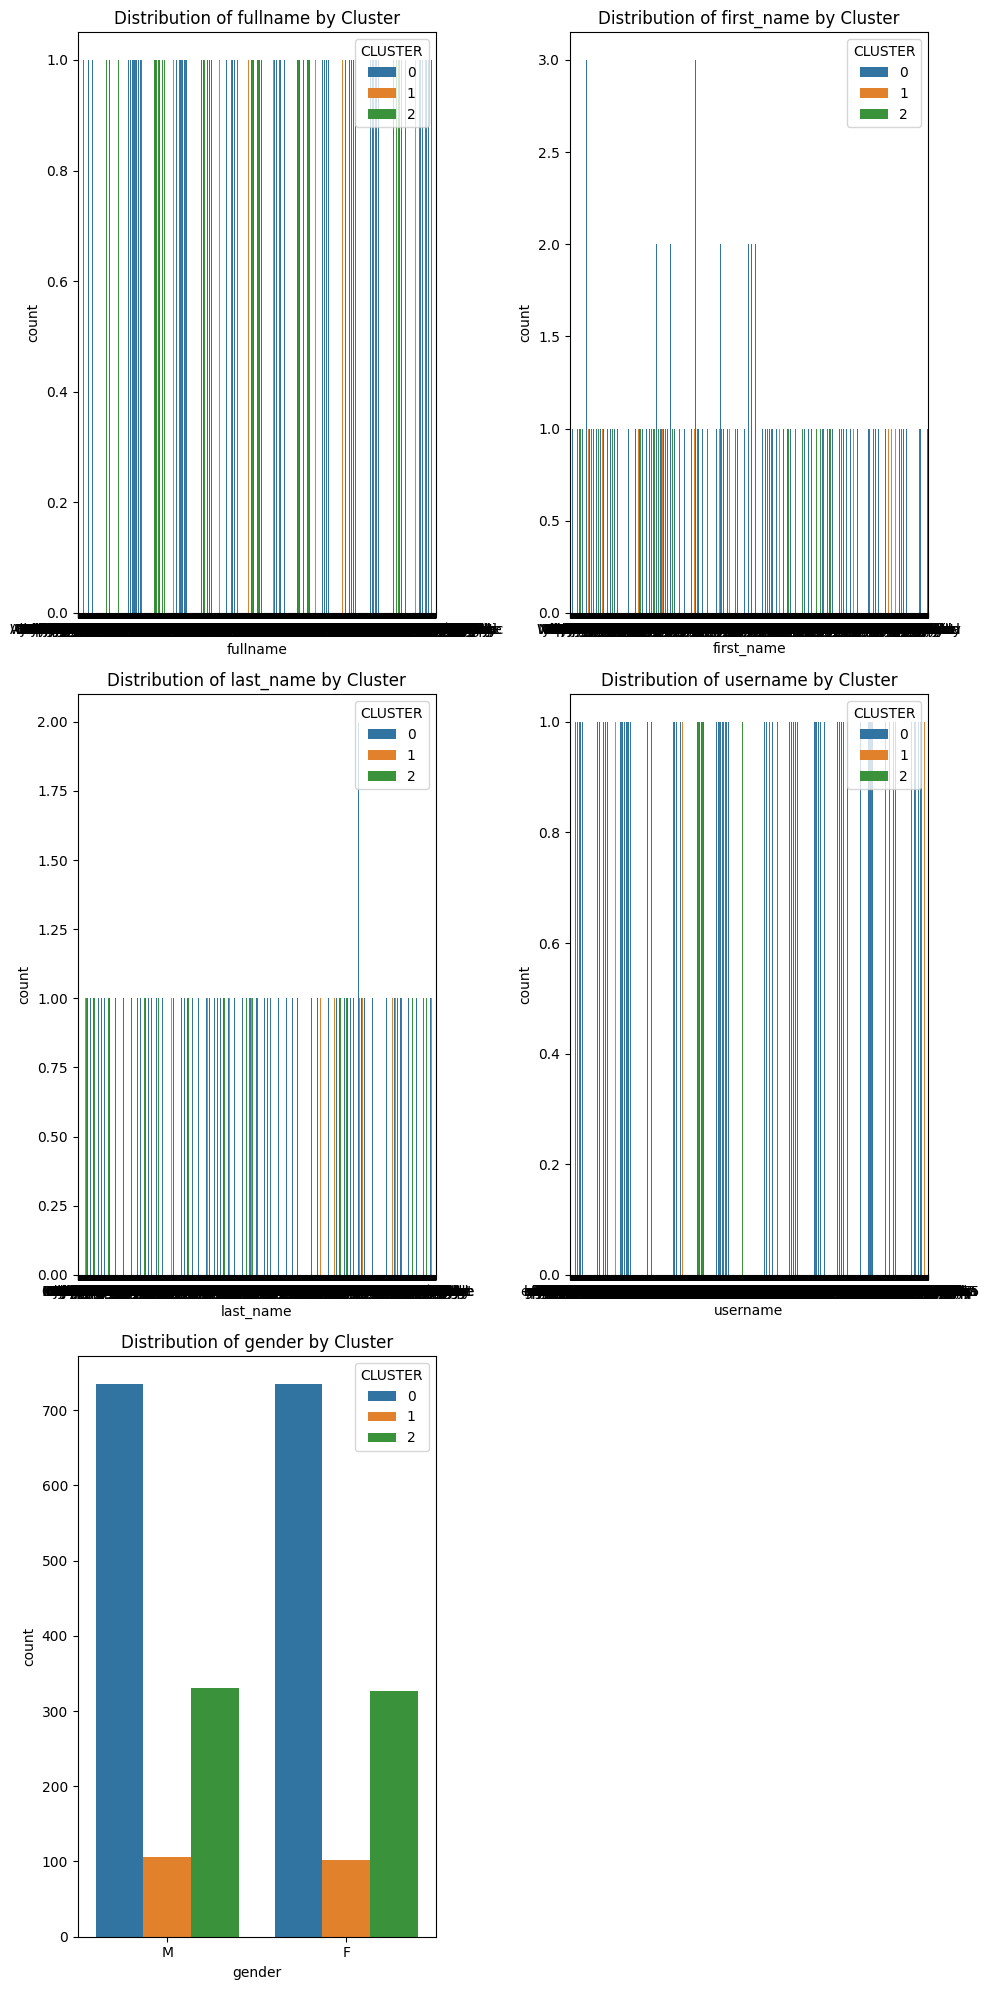

In [41]:
# Check clusters vs categorical columns
fig = plt.figure(figsize=(10, 20))
cols = cat_columns
num_rows = 3
num_cols = 2

for index in range(5):
    fig.add_subplot(num_rows, num_cols, index + 1)
    sns.countplot(data=new_data, x=cat_columns[index], hue='CLUSTER')
    plt.title(f'Distribution of {cat_columns[index]} by Cluster')

plt.tight_layout()
plt.show()

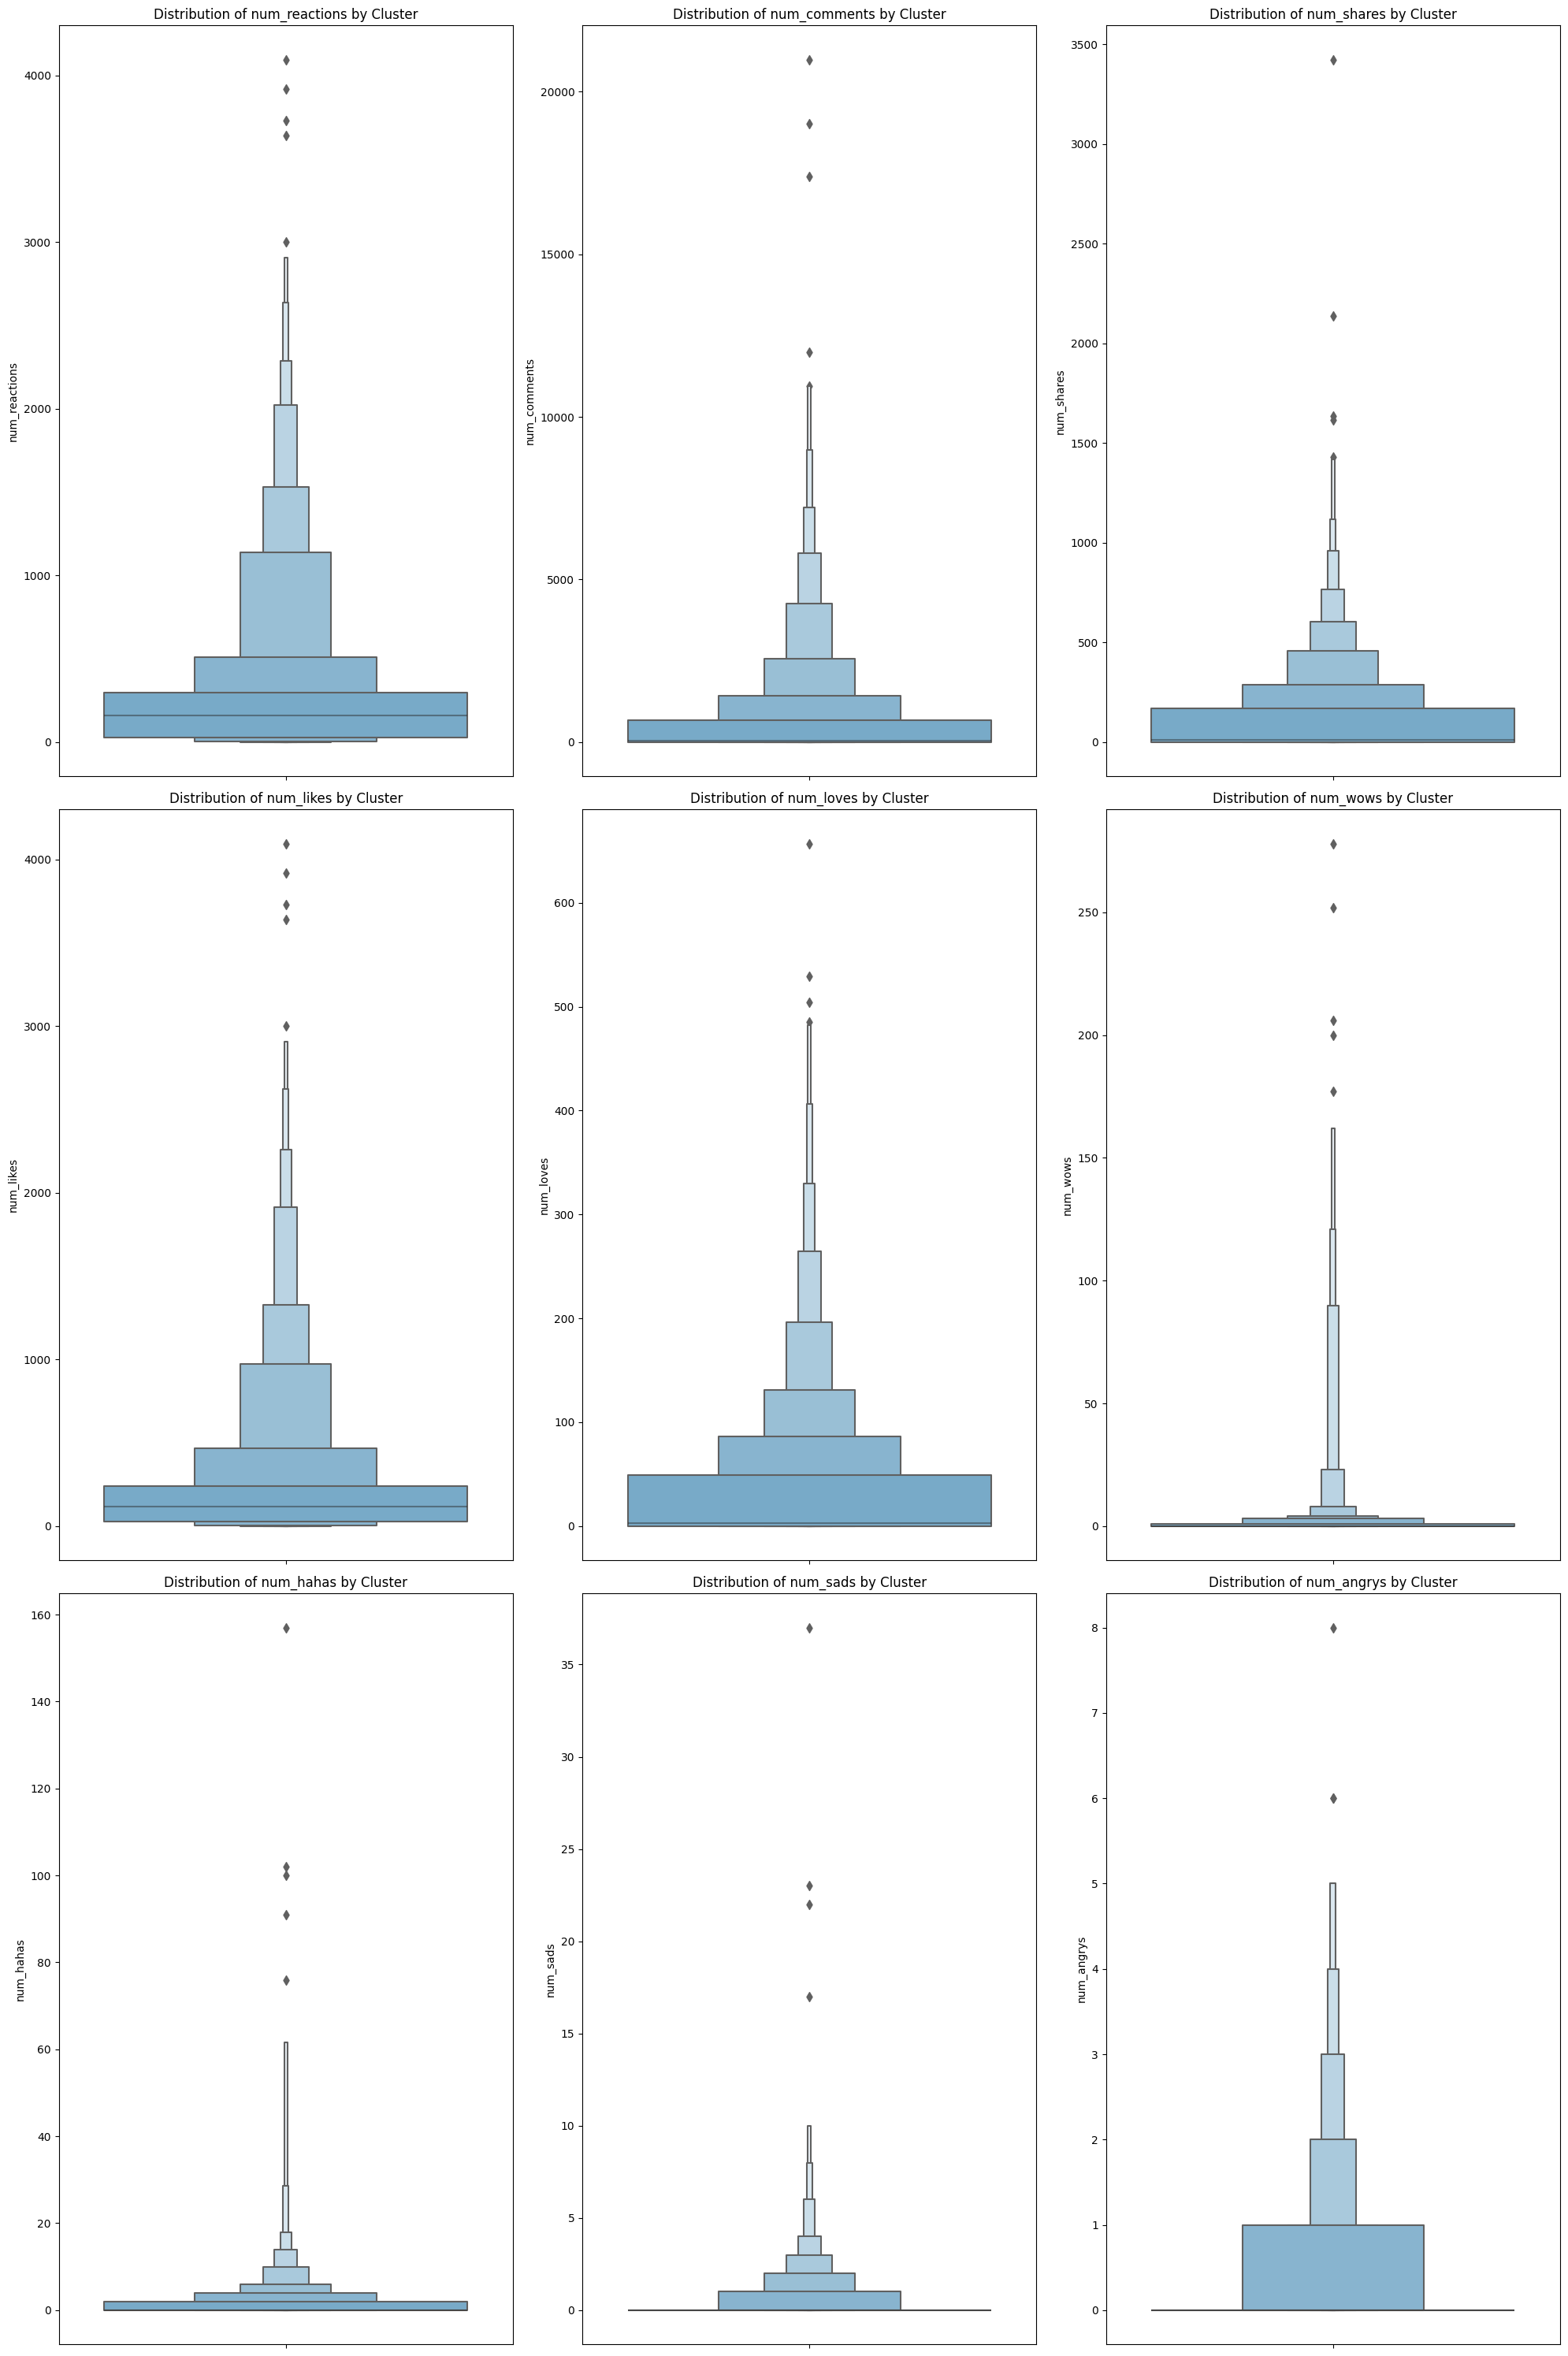

In [42]:
# Check clusters vs numerical columns
fig = plt.figure(figsize=(20, 30))
cols = num_columns
num_rows = 3
num_cols = 3

for index in range(9):
    fig.add_subplot(num_rows, num_cols, index + 1)
    sns.boxenplot(data=new_data, hue='CLUSTER', y=num_columns[index], palette='Blues')
    plt.title(f'Distribution of {num_columns[index]} by Cluster')

plt.tight_layout()
plt.show()

## 9. Model Saving

In [43]:
# Save model and other files
with open('scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)

with open('KMeans.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

**penjelasan** :

- save **scaler** for scaling
- save **pca** for dimentionality reduction
- save **km** for clustering
- save **num and cat_columns** for splitting between numerical and categorical column

## 10. Model Inference

In [44]:
# Load model and other files
with open("scaler.pkl", "rb") as file_1:
  scaler = pickle.load(file_1)

with open('pca.pkl', 'rb') as file_2:
  pca = pickle.load(file_2)

with open('KMeans.pkl', 'rb') as file_3:
  model = pickle.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_col = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  list_cat_col = json.load(file_5)

**penjelasan** :

load the saved model

In [45]:
new_data.columns

Index(['fullname', 'first_name', 'last_name', 'username', 'gender',
       'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'CLUSTER'],
      dtype='object')

In [46]:
new_data['CLUSTER'].unique

<bound method Series.unique of 0       1
1       0
2       0
3       0
4       2
       ..
2329    0
2330    0
2331    0
2332    0
2333    0
Name: CLUSTER, Length: 2334, dtype: int32>

**penjelasan** :

making a random data and create a dataframe

In [47]:
def generate_random_data(num_rows: int) -> pd.DataFrame:
    """Generate random data"""
    countries = np.random.choice(list(string.ascii_lowercase), size=num_rows, replace=True)
    data = {
        'fullname': [''.join(np.random.choice(list(string.ascii_lowercase), size=10)) for _ in range(num_rows)],
        'first_name': [''.join(np.random.choice(list(string.ascii_lowercase), size=5)) for _ in range(num_rows)],
        'last_name': [''.join(np.random.choice(list(string.ascii_lowercase), size=7)) for _ in range(num_rows)],
        'username': [''.join(np.random.choice(list(string.ascii_lowercase), size=8)) for _ in range(num_rows)],
        'gender': np.random.choice(['M', 'F'], size=num_rows),
        'num_reactions': np.random.randint(0, 1000, num_rows),
        'num_comments': np.random.randint(0, 500, num_rows),
        'num_shares': np.random.randint(0, 300, num_rows),
        'num_likes': np.random.randint(0, 800, num_rows),
        'num_loves': np.random.randint(0, 700, num_rows),
        'num_wows': np.random.randint(0, 600, num_rows),
        'num_hahas': np.random.randint(0, 500, num_rows),
        'num_sads': np.random.randint(0, 400, num_rows),
        'num_angrys': np.random.randint(0, 300, num_rows),
        'CLUSTER': np.random.randint(0, 5, num_rows),
    }
    return pd.DataFrame(data)

In [48]:
def preprocess_data(data: pd.DataFrame) -> tuple:
    """Preprocess data"""
    categorical_columns = ['fullname','first_name','last_name','username','gender', 'CLUSTER']
    numerical_columns = [col for col in data.columns if col not in categorical_columns]
    
    data_cat = data[categorical_columns]
    data_num = data[numerical_columns]
    
    scaler = StandardScaler()
    data_num_scaled = scaler.fit_transform(data_num)
    
    pca = PCA(n_components=2)
    data_num_pca = pca.fit_transform(data_num_scaled)
    
    return data_cat, data_num_pca

In [49]:
def cluster_data(data_num_pca: np.ndarray) -> np.ndarray:
    """Apply KMeans clustering"""
    kmeans = KMeans(n_clusters=2)
    data_pred = kmeans.fit_predict(data_num_pca)
    return data_pred

In [50]:
def visualize_clusters(data_cat: pd.DataFrame, data_num_pca: np.ndarray, data_pred: np.ndarray) -> None:
    """Visualize clusters in 2D and return predicted cluster and gender information"""
    plt.scatter(data_num_pca[:, 0], data_num_pca[:, 1], c=data_pred)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Cluster Visualization')
    plt.show()
    
    # Return predicted cluster and gender information
    predicted_clusters = pd.DataFrame({'gender': data_cat['gender'], 'predicted_cluster': data_pred})
    return predicted_clusters

In [51]:
# Generate random data
num_rows = 20
random_data = generate_random_data(num_rows)


In [52]:
random_data

,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,CLUSTER
0,ottznymkhk,ltldj,ffimmjf,qkvppfts,F,241,178,182,50,505,218,398,381,30,3
1,awlyqucgjb,oraqk,cjmbysn,jddjfnid,M,910,406,114,317,194,141,88,62,286,4
2,ovymscrqcf,uifbm,ngsfpxt,wkaxwpob,M,313,397,270,676,96,490,181,257,148,4
3,qdsbttdksb,rfiul,wqaxtpx,gsoghpnf,M,294,170,251,484,414,468,316,84,273,0
4,vfyznyuxke,gkcyk,nmshcyy,rcagvzeg,F,211,334,181,286,531,108,150,80,236,2
5,yzzkhgvluc,vtxns,aakquay,kczxfowo,M,376,395,55,676,219,180,262,30,215,1
6,mlbbhwvxpe,dwltm,czamlvl,qrwcuzzq,F,551,339,85,22,225,324,363,279,185,1
7,ahgiimpzay,jxmmd,gifbbnj,nmlstyls,M,504,296,230,12,206,236,145,263,61,0
8,jhwqlolgrg,kckid,lqcwoem,lemhmdaf,M,264,440,128,498,146,175,386,168,118,0
9,aeijlywlqj,dhbph,crnqtan,yquyxicr,M,154,228,258,614,135,223,350,100,270,1


In [53]:
# Preprocess data
data_cat, data_num_pca = preprocess_data(random_data)


In [54]:
# Apply KMeans clustering
data_pred = cluster_data(data_num_pca)

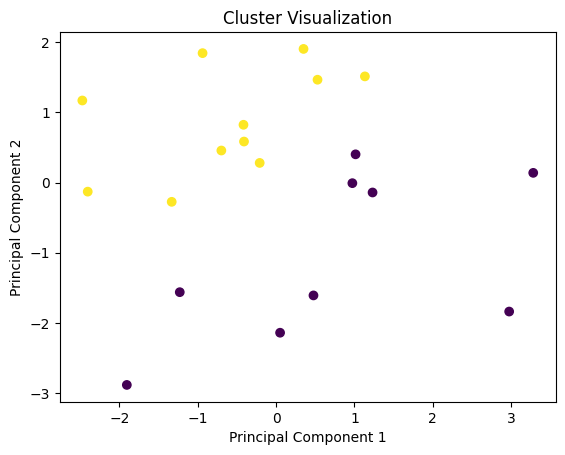

   gender  predicted_cluster
0       F                  0
1       M                  0
2       M                  1
3       M                  1
4       F                  0
5       M                  1
6       F                  0
7       M                  0
8       M                  1
9       M                  1
10      F                  1
11      M                  0
12      M                  0
13      M                  0
14      F                  1
15      F                  0
16      M                  1
17      M                  1
18      M                  1
19      F                  1


In [55]:
# Visualize clusters and get predicted cluster and country information
predicted_clusters = visualize_clusters(data_cat, data_num_pca, data_pred)

print(predicted_clusters)

# 11. Kesimpulan

## Kesimpulan EDA
Berdasarkan EDA didapat kesimpulan sebagai berikut :

**Kesimpulan** :

- Data menunjukkan **banyak outlier** yang dapat mengganggu pengelompokan model, hal ini perlu ditangani dengan membatasi outlier
- Kolom `num_sad`dan `num_angry` menunjukkan **variasi rendah**, yang berarti outliernya tidak dapat ditangani dengan baik dan dapat berdampak pada algoritma berbasis centroid, seperti algoritma K-Means


### Model

**Kesimpulan** :
Dengan menggunakan algoritma K-Means, kami membuat model clustering berdasarkan data interaksi influencer Facebook Live. Model ini membagi data menjadi 3 Cluster dengan menggunakan Metode Elbow untuk menentukan jumlah cluster yang optimal yaitu 3, dan Silhouette Plot untuk melihat apakah data masih tumpang tindih di antara cluster. Dari Silhouette Plot, kami mendapatkan skor 0,32, yang menunjukkan bahwa cluster mungkin tidak terpisah dengan baik dan mungkin ada beberapa tingkat tumpang tindih di antara cluster.

- Cluster 0 mencakup influencer dengan interaksi yang moderat, termasuk jumlah reaksi, komentar, dan shares yang rata-rata. Influencer dalam cluster ini cocok untuk promosi produk kecantikan sehari-hari yang memerlukan engagement yang konsisten.

- Cluster 1 terdiri dari influencer dengan interaksi yang lebih tinggi, terutama dalam hal reaksi positif seperti likes dan loves. Influencer dalam cluster ini cocok untuk promosi produk kecantikan premium yang memerlukan demonstrasi dan showcase yang lebih menarik.

- Cluster 2 mencakup influencer dengan interaksi yang sangat tinggi, termasuk banyak shares dan komentar. Influencer dalam cluster ini cocok untuk promosi produk kecantikan edisi terbatas atau kampanye yang memerlukan buzz tinggi dan viral marketing.

Dengan pemahaman ini, perusahaan dapat merancang strategi pemasaran yang lebih tepat sasaran dan memanfaatkan influencer dengan cara yang paling efektif untuk mempromosikan produk kecantikan wanita.






*

### Cluster

- Cluster 0 :
Tawarkan kepada mereka produk kecantikan wanita yang berfokus pada perawatan kulit dasar dan rutinitas sehari-hari. Influencer dalam cluster ini dapat mempromosikan produk seperti pelembap, pembersih wajah, dan sunscreen yang penting untuk pemeliharaan kulit sehari-hari. Memberikan sampel gratis atau diskon untuk produk pertama kali dapat meningkatkan minat dan engagement.

- Cluster 1 :
Tawarkan kepada mereka produk kecantikan yang lebih premium dan alat kecantikan yang lebih canggih. Influencer dalam cluster ini dapat mempromosikan produk seperti serum anti-penuaan, perawatan wajah dengan teknologi tinggi, dan produk makeup premium. Mengadakan acara live demo yang menampilkan cara penggunaan produk-produk ini secara efektif dapat menarik perhatian dan meningkatkan konversi.

- Cluster 2 :
Tawarkan kepada mereka program loyalitas dan penawaran khusus yang sesuai dengan kebiasaan belanja mereka. Influencer dalam cluster ini dapat mempromosikan produk seperti koleksi makeup edisi terbatas atau rangkaian perawatan kulit eksklusif. Menyediakan program rewards yang memberikan poin setiap kali mereka melakukan pembelian dan dapat ditukarkan dengan produk gratis atau diskon dapat meningkatkan loyalitas pelanggan dan frekuensi pembelian.

Rekomendasi ini disesuaikan dengan karakteristik masing-masing cluster berdasarkan interaksi dan engagement yang diperoleh dari data Facebook Live, sehingga dapat membantu perusahaan dalam merancang strategi pemasaran yang lebih efektif dan tepat sasaran.

## Recommendation

### Model 

**Rekomendasi** :

Skor siluet `0,32` relatif **rendah**, menunjukkan bahwa masih ada ruang untuk perbaikan dalam kualitas pengelompokan. Hal ini menunjukkan bahwa cluster-cluster tersebut mungkin tidak terpisah dengan baik, dan mungkin terdapat beberapa tingkat tumpang tindih di antara cluster-cluster tersebut. Untuk meningkatkan kualitas pengelompokan, kita dapat mencoba:
- Penskalaan Fitur:

    Dalam Rekayasa Fitur ini kami menggunakan Scaler Standar, kami dapat menggunakan teknik seperti **Min-Max scaling** untuk menstandarkan fitur, yang mungkin meningkatkan kinerja pengelompokan.
- Pemilihan Fitur atau Pengurangan Dimensi:

    Kurangi dimensi kumpulan data jika memiliki banyak fitur. Dalam model ini kita menggunakan PCA, kita dapat menggunakan teknik lain seperti **t-Distributed Stochastic Neighbor Embedding (t-SNE)** untuk membantu menyimpan informasi penting sekaligus mengurangi noise.
- Coba Algoritma Pengelompokan yang Berbeda:

    Dalam model ini kami menggunakan algoritme K-Means, kami dapat bereksperimen dengan algoritme pengelompokan yang berbeda seperti pengelompokan **DBSCAN**, atau pengelompokan **hierarki**. Algoritme yang berbeda mungkin memiliki kinerja yang lebih baik pada jenis kumpulan data yang berbeda.
- Parameter Algoritma Tune :

    Sesuaikan hyperparameter algoritma pengelompokan. Dalam model clustering K-means ini kita menggunakan 10 jumlah iterasi, kita dapat mencoba jumlah iterasi yang berbeda.
- Evaluasi :

    Selain skor siluet, kami dapat mempertimbangkan untuk menggunakan metrik evaluasi pengelompokan lainnya seperti **Davies-Bouldin index**, **Calinski-Harabasz index**, atau inspeksi visual kualitas kluster untuk memvalidasi hasilnya.

## Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
    - **Inertia** : Inertia digunakan untuk mengukur seberapa baik K-Means melakukan klustering pada dataset. nilai inertia dan kluster yang rendah menunjukkan bahwa model itu dibuat dengan baik. 
    - **Cara menghitung Inertia** : Mengukur jarak antar setiap data point dan centroid nya, mengkuadratkan jaraknya dan menambahkan hasil kuadrat dalam satu kluster / WCSS (Within-Cluster Sum of Square).

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
    - **Alasan penggunaan** : Digunakan untuk menentukan jumlah kluster yang optimal dalam sebuah dataset.
    - **Cara penggunaan** : 
        1. Mulailah dengan memilih sejumlah k yang mungkin sebagai jumlah klaster.
        2. Hitung inertia (misalnya, dengan menggunakan metode K-Means) untuk setiap nilai k tersebut.
        3. Plot grafik nilai inertia terhadap jumlah klaster.
        4. Identifikasi titik di mana penurunan inertia mulai melambat secara signifikan. Titik ini adalah titik siku pada grafik.
        5. Jumlah klaster di titik siku tersebut adalah jumlah klaster optimal yang dapat dipilih.
    - **Kelemahan** : 
        - Terkadang tidak jelas di mana titik siku sebenarnya berada pada grafik, terutama jika pola tidak terlalu jelas.
        - Tidak selalu memberikan hasil yang optimal terutama untuk data yang kompleks atau tidak simetris. Dalam kasus-kasus tersebut, mungkin diperlukan metode evaluasi lainnya.
    - **Kelebihan** :
        - Sederhana dan mudah dipahami.
        - Memberikan petunjuk yang baik dalam menentukan jumlah klaster tanpa harus mengandalkan asumsi tertentu tentang data.